# Milestone 1

Simple traning and testing with pick up and drop off location and passenger count.

In [1]:
# mount google drive

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
%matplotlib inline
# without this the plots would be opened  in a new window (not browser)
# with this instruction plots will be included in the notebook

In [3]:
# Use %config InlineBackend.figure_format = 'retina'
# after %matplotlib inline to render higher resolution images
%config InlineBackend.figure_format = 'retina'

## Getting Started

In [4]:
# Loading neccesary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

In [5]:
# reading the uber data from dataset to a panda dataframe
# data=pd.read_parquet('drive/My Drive/Colab Notebooks/ML_ASG1_DATA/fhvhv_tripdata_2022-11.parquet')
data=pd.read_parquet('./fhvhv_tripdata_2022-11.parquet')
data = data.sample(n=10000, random_state=1)
data.describe()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,10000,7147,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2022-11-15 21:35:30.946900,2022-11-15 18:05:34.362110,2022-11-15 21:40:34.998100,2022-11-15 22:00:16.419000,138.464000,142.047600,5.018123,1182.525700,23.656309,1.166751,0.751288,1.991385,1.133200,0.207500,1.084035,18.450975
min,2022-11-01 00:03:53,2022-11-01 00:11:30,2022-11-01 00:07:47,2022-11-01 00:16:04,3.000000,1.000000,0.000000,61.000000,-13.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-11-08 16:34:10,2022-11-08 11:18:16.500000,2022-11-08 16:40:45.250000,2022-11-08 16:53:28.250000,75.000000,76.000000,1.565500,602.000000,11.390000,0.000000,0.340000,0.950000,0.000000,0.000000,0.000000,8.567500
50%,2022-11-15 20:25:17,2022-11-15 17:10:36,2022-11-15 20:30:34,2022-11-15 20:52:36,140.000000,141.000000,2.974500,964.000000,17.965000,0.000000,0.540000,1.510000,0.000000,0.000000,0.000000,14.215000
75%,2022-11-22 23:10:54.500000,2022-11-22 20:07:41,2022-11-22 23:16:01,2022-11-22 23:33:25.250000,209.000000,216.000000,6.164250,1520.000000,29.182500,0.000000,0.910000,2.490000,2.750000,0.000000,0.000000,23.082500
max,2022-11-30 23:55:02,2022-11-30 23:54:05,2022-11-30 23:59:30,2022-12-01 00:38:48,263.000000,265.000000,87.000000,7499.000000,285.450000,46.550000,9.270000,18.040000,5.500000,5.000000,46.040000,225.090000
std,NaN,NaN,NaN,NaN,74.685075,77.660335,5.816839,830.709817,19.110203,4.014533,0.656637,1.596652,1.351052,0.688606,2.887688,15.132191


In [6]:
data.head(10)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
12201792,HV0003,B03404,B03404,2022-11-20 10:58:36,2022-11-20 11:02:12,2022-11-20 11:02:45,2022-11-20 11:19:49,41,48,5.280,...,2.24,2.75,0.0,3.09,16.33,N,N,,N,N
5140632,HV0003,B03404,B03404,2022-11-09 18:14:12,2022-11-09 18:19:25,2022-11-09 18:19:42,2022-11-09 18:26:37,157,82,1.390,...,0.94,0.00,0.0,0.00,6.83,N,N,,N,N
13040156,HV0003,B03404,B03404,2022-11-21 19:10:06,2022-11-21 19:13:37,2022-11-21 19:13:41,2022-11-21 19:33:56,163,125,4.790,...,3.78,2.75,0.0,0.00,29.50,N,N,,N,N
2107754,HV0003,B03404,B03404,2022-11-04 17:46:25,2022-11-04 17:46:43,2022-11-04 17:47:21,2022-11-04 18:03:00,10,130,2.210,...,1.27,0.00,0.0,5.00,11.18,N,N,,N,N
17227919,HV0003,B03404,B03404,2022-11-29 15:23:51,2022-11-29 15:28:55,2022-11-29 15:29:02,2022-11-29 15:33:30,210,210,0.630,...,0.67,0.00,0.0,0.00,5.94,N,N,,N,N
10924600,HV0003,B03404,B03404,2022-11-18 19:55:59,2022-11-18 19:59:36,2022-11-18 19:59:57,2022-11-18 20:06:06,41,238,1.140,...,0.70,0.00,0.0,1.00,6.84,N,N,,N,N
14977583,HV0005,B03406,None,2022-11-25 10:13:47,NaT,2022-11-25 10:18:30,2022-11-25 10:35:28,198,138,7.584,...,2.46,0.00,2.5,0.00,17.86,N,N,N,N,N
7891490,HV0005,B03406,None,2022-11-13 20:00:59,NaT,2022-11-13 20:03:31,2022-11-13 20:30:47,37,79,4.435,...,2.03,2.75,0.0,0.00,19.67,N,N,N,N,N
15668172,HV0003,B03404,B03404,2022-11-26 17:41:07,2022-11-26 17:42:42,2022-11-26 17:43:24,2022-11-26 17:53:56,143,246,1.730,...,1.03,2.75,0.0,0.00,7.93,N,N,,N,N
12055493,HV0003,B03404,B03404,2022-11-20 04:51:32,2022-11-20 04:55:31,2022-11-20 04:55:59,2022-11-20 05:00:53,114,249,0.630,...,0.65,2.75,0.0,0.00,17.56,N,N,,N,Y


## Data Exploration and Preprocessing

### Dropping rows with negative values in the fees

In [7]:
## dropping rows with negative values
fares = ['base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'driver_pay', 'tips', 'congestion_surcharge', 'airport_fee']
data = data[(data[fares] >= 0).all(axis=1)]

### Sanitizing rows with 0 in fare, miles, taxes and time etc

#### Fare

In [8]:
data[data['base_passenger_fare'] == 0.0]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag


In [9]:
## dropping rows with 0 fare
data = data[data['base_passenger_fare'] != 0.0]

#### Taxes

In [10]:
data[data['sales_tax'] == 0.0]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
11269073,HV0005,B03406,None,2022-11-19 05:05:32,NaT,2022-11-19 05:18:17,2022-11-19 05:51:21,65,265,17.810,...,0.0,0.0,0.0,0.00,64.65,N,N,N,N,N
7595993,HV0003,B03404,B03404,2022-11-13 11:38:34,2022-11-13 11:47:34,2022-11-13 11:47:47,2022-11-13 12:38:36,84,265,19.370,...,0.0,0.0,0.0,0.00,51.28,N,N,,N,N
6760673,HV0003,B03404,B03404,2022-11-12 07:48:41,2022-11-12 07:52:54,2022-11-12 07:52:57,2022-11-12 08:22:28,116,1,24.640,...,0.0,0.0,2.5,19.38,47.98,N,N,,N,N
14955827,HV0003,B03404,B03404,2022-11-25 09:01:42,2022-11-25 09:02:07,2022-11-25 09:04:00,2022-11-25 09:59:06,132,265,27.500,...,0.0,0.0,2.5,0.00,65.15,N,N,,N,N
4166349,HV0005,B03406,None,2022-11-07 22:10:21,NaT,2022-11-07 22:13:03,2022-11-07 22:44:23,162,265,18.446,...,0.0,0.0,0.0,12.55,42.30,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12380094,HV0003,B03404,B03404,2022-11-20 17:27:07,2022-11-20 17:32:10,2022-11-20 17:33:09,2022-11-20 18:11:16,230,1,17.090,...,0.0,0.0,2.5,0.00,47.02,N,N,,N,N
17434237,HV0005,B03406,None,2022-11-29 22:21:15,NaT,2022-11-29 22:26:31,2022-11-29 22:57:14,164,265,13.533,...,0.0,0.0,0.0,0.00,35.59,N,N,N,N,N
1982282,HV0005,B03406,None,2022-11-04 13:06:51,NaT,2022-11-04 13:10:19,2022-11-04 13:55:01,113,1,14.033,...,0.0,0.0,2.5,0.00,50.23,N,N,N,N,Y
16232218,HV0005,B03406,None,2022-11-27 16:08:33,NaT,2022-11-27 16:12:54,2022-11-27 17:14:20,142,1,18.454,...,0.0,0.0,2.5,0.00,60.43,N,N,N,N,N


In [11]:
tax_rate = 0.08875

In [12]:
# calculating taxes based on fare
data.loc[data['sales_tax'] == 0, 'sales_tax'] = ( (data['base_passenger_fare'] + data['airport_fee'] +  data['tolls'])* tax_rate).round(2)

In [13]:
data[data['sales_tax'] == 0.0]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
1077720,HV0003,B03404,B03404,2022-11-02 23:13:22,2022-11-02 23:18:13,2022-11-02 23:18:28,2022-11-02 23:38:23,79,129,7.94,...,0.0,2.75,0.0,0.0,19.77,N,N,,N,N
2558616,HV0003,B03404,B03404,2022-11-05 09:24:12,2022-11-05 09:26:59,2022-11-05 09:28:29,2022-11-05 09:53:41,37,255,4.75,...,0.0,0.00,0.0,0.0,25.80,N,N,,N,N


In [13]:
## dropping rows with 0 taxes
data = data[data['sales_tax'] != 0.0]

In [14]:
data[data['sales_tax'] == 0.0]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag


#### Fare

In [15]:
data['fare'] = (data['sales_tax'] / tax_rate)

In [16]:
data[['base_passenger_fare', 'fare', 'sales_tax']]

,base_passenger_fare,fare,sales_tax
12201792,25.21,25.239437,2.24
5140632,10.64,10.591549,0.94
13040156,42.57,42.591549,3.78
2107754,14.28,14.309859,1.27
17227919,7.51,7.549296,0.67
...,...,...,...
67824,7.51,7.549296,0.67
895041,57.34,57.352113,5.09
12374961,12.40,12.394366,1.10
15510130,26.65,34.028169,3.02


In [17]:
data.loc[data['base_passenger_fare'] < data['fare'] * 0.95, 'base_passenger_fare'] = data['fare']

In [18]:
data.drop(columns=['fare'], inplace=True)

### Fixing Miles and time

In [19]:
## filtered data
new_dataset = data.loc[(data['trip_miles'] > 0) & (data['trip_time'] > 0), ['trip_miles', 'trip_time']]
new_dataset['speed'] = new_dataset['trip_miles'] / new_dataset['trip_time']

In [20]:
avg_speed = new_dataset['speed'].mean()
avg_speed

0.003807077188235091

In [21]:
del new_dataset

In [22]:
data = data[~((data['trip_time'] == 0) & (data['trip_miles'] == 0))]

In [24]:
## replacing miles is 0 with avg speed using trip time
data.loc[data['trip_miles'] == 0, 'trip_miles'] = avg_speed * data['trip_time']

In [23]:
data[data['trip_time'] == 0.0]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag


In [24]:
data[data['trip_miles'] == 0.0]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
664192,HV0005,B03406,None,2022-11-02 08:07:50,NaT,2022-11-02 08:23:27,2022-11-02 08:24:28,185,185,0.0,...,0.69,0.00,0.0,0.0,7.72,N,N,N,N,N
10384112,HV0005,B03406,None,2022-11-17 23:03:30,NaT,2022-11-17 23:16:55,2022-11-17 23:18:16,148,148,0.0,...,0.84,2.75,0.0,2.0,11.07,N,N,N,N,N


In [25]:
data.head(10)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
12201792,HV0003,B03404,B03404,2022-11-20 10:58:36,2022-11-20 11:02:12,2022-11-20 11:02:45,2022-11-20 11:19:49,41,48,5.280,...,2.24,2.75,0.0,3.09,16.33,N,N,,N,N
5140632,HV0003,B03404,B03404,2022-11-09 18:14:12,2022-11-09 18:19:25,2022-11-09 18:19:42,2022-11-09 18:26:37,157,82,1.390,...,0.94,0.00,0.0,0.00,6.83,N,N,,N,N
13040156,HV0003,B03404,B03404,2022-11-21 19:10:06,2022-11-21 19:13:37,2022-11-21 19:13:41,2022-11-21 19:33:56,163,125,4.790,...,3.78,2.75,0.0,0.00,29.50,N,N,,N,N
2107754,HV0003,B03404,B03404,2022-11-04 17:46:25,2022-11-04 17:46:43,2022-11-04 17:47:21,2022-11-04 18:03:00,10,130,2.210,...,1.27,0.00,0.0,5.00,11.18,N,N,,N,N
17227919,HV0003,B03404,B03404,2022-11-29 15:23:51,2022-11-29 15:28:55,2022-11-29 15:29:02,2022-11-29 15:33:30,210,210,0.630,...,0.67,0.00,0.0,0.00,5.94,N,N,,N,N
10924600,HV0003,B03404,B03404,2022-11-18 19:55:59,2022-11-18 19:59:36,2022-11-18 19:59:57,2022-11-18 20:06:06,41,238,1.140,...,0.70,0.00,0.0,1.00,6.84,N,N,,N,N
14977583,HV0005,B03406,None,2022-11-25 10:13:47,NaT,2022-11-25 10:18:30,2022-11-25 10:35:28,198,138,7.584,...,2.46,0.00,2.5,0.00,17.86,N,N,N,N,N
7891490,HV0005,B03406,None,2022-11-13 20:00:59,NaT,2022-11-13 20:03:31,2022-11-13 20:30:47,37,79,4.435,...,2.03,2.75,0.0,0.00,19.67,N,N,N,N,N
15668172,HV0003,B03404,B03404,2022-11-26 17:41:07,2022-11-26 17:42:42,2022-11-26 17:43:24,2022-11-26 17:53:56,143,246,1.730,...,1.03,2.75,0.0,0.00,7.93,N,N,,N,N
12055493,HV0003,B03404,B03404,2022-11-20 04:51:32,2022-11-20 04:55:31,2022-11-20 04:55:59,2022-11-20 05:00:53,114,249,0.630,...,0.65,2.75,0.0,0.00,17.56,N,N,,N,Y


### Dropping features that are not useful


In [26]:
#drop columns that are not useful
data.drop(columns=['dispatching_base_num', 'originating_base_num', 'request_datetime', 'on_scene_datetime'], inplace=True)

#### Making "total_fare"

In [27]:
# make a new feature called "total_fare" thats the sum of of these features: base_passenger_fare+tolls+bcf+sales_tax+congestion_surcharge +airport_fee
data["total_fare"] = data["base_passenger_fare"] + data["tolls"] + data["bcf"] + data["sales_tax"] + data["congestion_surcharge"] + data["airport_fee"]


In [28]:
# fares = ['base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'driver_pay', 'tips', 'congestion_surcharge', 'airport_fee']
# dropping redundant features, tips is not relevant
data.drop(columns=fares, inplace=True)

In [29]:
data.head(10)

,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,total_fare
12201792,HV0003,2022-11-20 11:02:45,2022-11-20 11:19:49,41,48,5.280,1024,N,N,,N,N,30.96000
5140632,HV0003,2022-11-09 18:19:42,2022-11-09 18:26:37,157,82,1.390,415,N,N,,N,N,11.90000
13040156,HV0003,2022-11-21 19:13:41,2022-11-21 19:33:56,163,125,4.790,1215,N,N,,N,N,50.38000
2107754,HV0003,2022-11-04 17:47:21,2022-11-04 18:03:00,10,130,2.210,939,N,N,,N,N,15.98000
17227919,HV0003,2022-11-29 15:29:02,2022-11-29 15:33:30,210,210,0.630,268,N,N,,N,N,8.41000
10924600,HV0003,2022-11-18 19:59:57,2022-11-18 20:06:06,41,238,1.140,369,N,N,,N,N,8.85000
14977583,HV0005,2022-11-25 10:18:30,2022-11-25 10:35:28,198,138,7.584,1018,N,N,N,N,N,33.50831
7891490,HV0005,2022-11-13 20:03:31,2022-11-13 20:30:47,37,79,4.435,1636,N,N,N,N,N,28.37000
15668172,HV0003,2022-11-26 17:43:24,2022-11-26 17:53:56,143,246,1.730,632,N,N,,N,N,15.77000
12055493,HV0003,2022-11-20 04:55:59,2022-11-20 05:00:53,114,249,0.630,294,N,N,,N,Y,11.00000


In [30]:
## checking correlation for some features
def map_values(value):
    if value == 'Y':
        return 1
    else:
        return 0
    return value

features = ['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag']
## mapping Y to 1 and N or null to 0
for feature in features:
    data[feature] = data[feature].apply(map_values)


In [31]:
data.head()

,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,total_fare
12201792,HV0003,2022-11-20 11:02:45,2022-11-20 11:19:49,41,48,5.28,1024,0,0,0,0,0,30.96
5140632,HV0003,2022-11-09 18:19:42,2022-11-09 18:26:37,157,82,1.39,415,0,0,0,0,0,11.90
13040156,HV0003,2022-11-21 19:13:41,2022-11-21 19:33:56,163,125,4.79,1215,0,0,0,0,0,50.38
2107754,HV0003,2022-11-04 17:47:21,2022-11-04 18:03:00,10,130,2.21,939,0,0,0,0,0,15.98
17227919,HV0003,2022-11-29 15:29:02,2022-11-29 15:33:30,210,210,0.63,268,0,0,0,0,0,8.41


<Axes: >

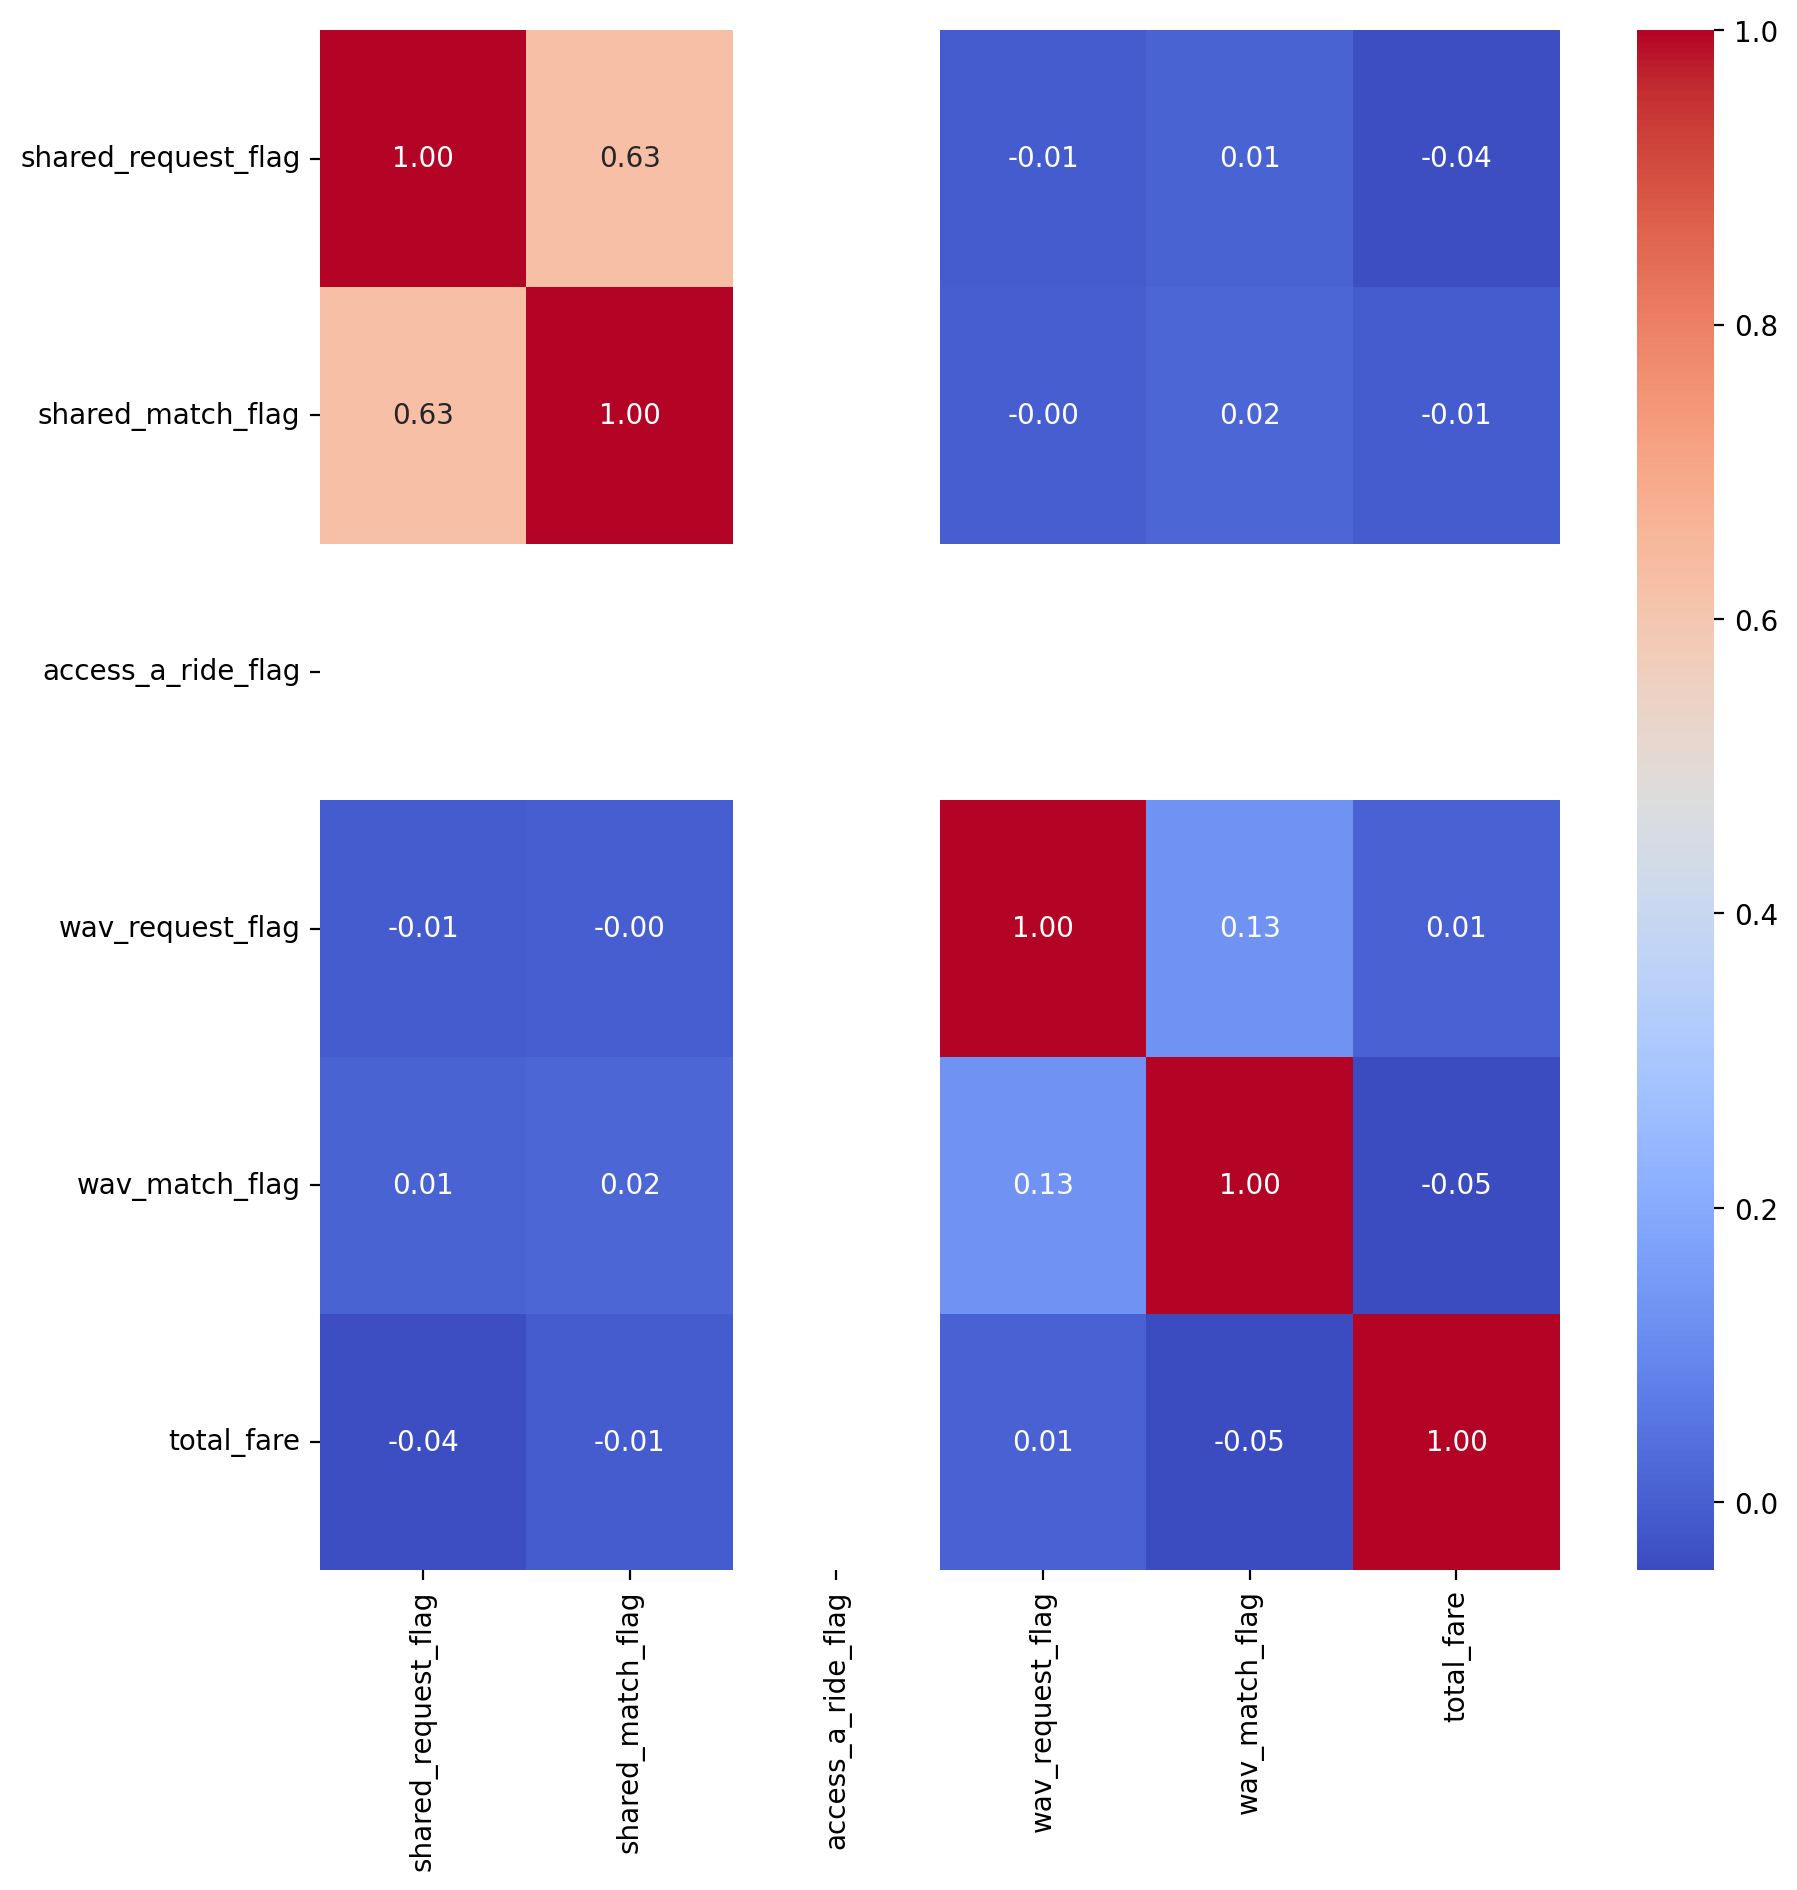

In [32]:
## generating correlation heatmap
columns_for_heatmap = features + ['total_fare']
# Calculate the correlation matrix
corr_matrix = data[columns_for_heatmap].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

In [33]:
## heatmap shows no strong correlation between these features and total_fare
## dropping features
data.drop(columns=features, inplace=True)

### Making new feature 'is_airport_trip'

airport trip charges additional $2.5

In [34]:
## airport_fee: $2.50 for both drop off and pick up at LaGuardia, Newark, and John F. Kennedy airports
## Location IDs:
## LaGuardia = 138
## Newark = 1
## JFK = 132

airport_locationIDs = [138, 1, 132]

In [35]:
# generate a new feature called is_airport_trip if either PULocationID or DOLocationID is in [138, 1, 132]
data['is_airport_trip'] = np.where((data['PULocationID'].isin(airport_locationIDs)) | (data['DOLocationID'].isin(airport_locationIDs)), 1, 0)

### Encode hvfhs_license_num

In [36]:
data = pd.get_dummies(data, columns=['hvfhs_license_num'])

In [37]:
new_column_names = {
    'hvfhs_license_num_HV0003': 'uber',
    'hvfhs_license_num_HV0005': 'lyft'
}

data.rename(columns=new_column_names, inplace=True)

In [38]:
corr_data = data[['trip_miles', 'trip_time', 'total_fare', 'is_airport_trip', 'uber', 'lyft']]

<Axes: >

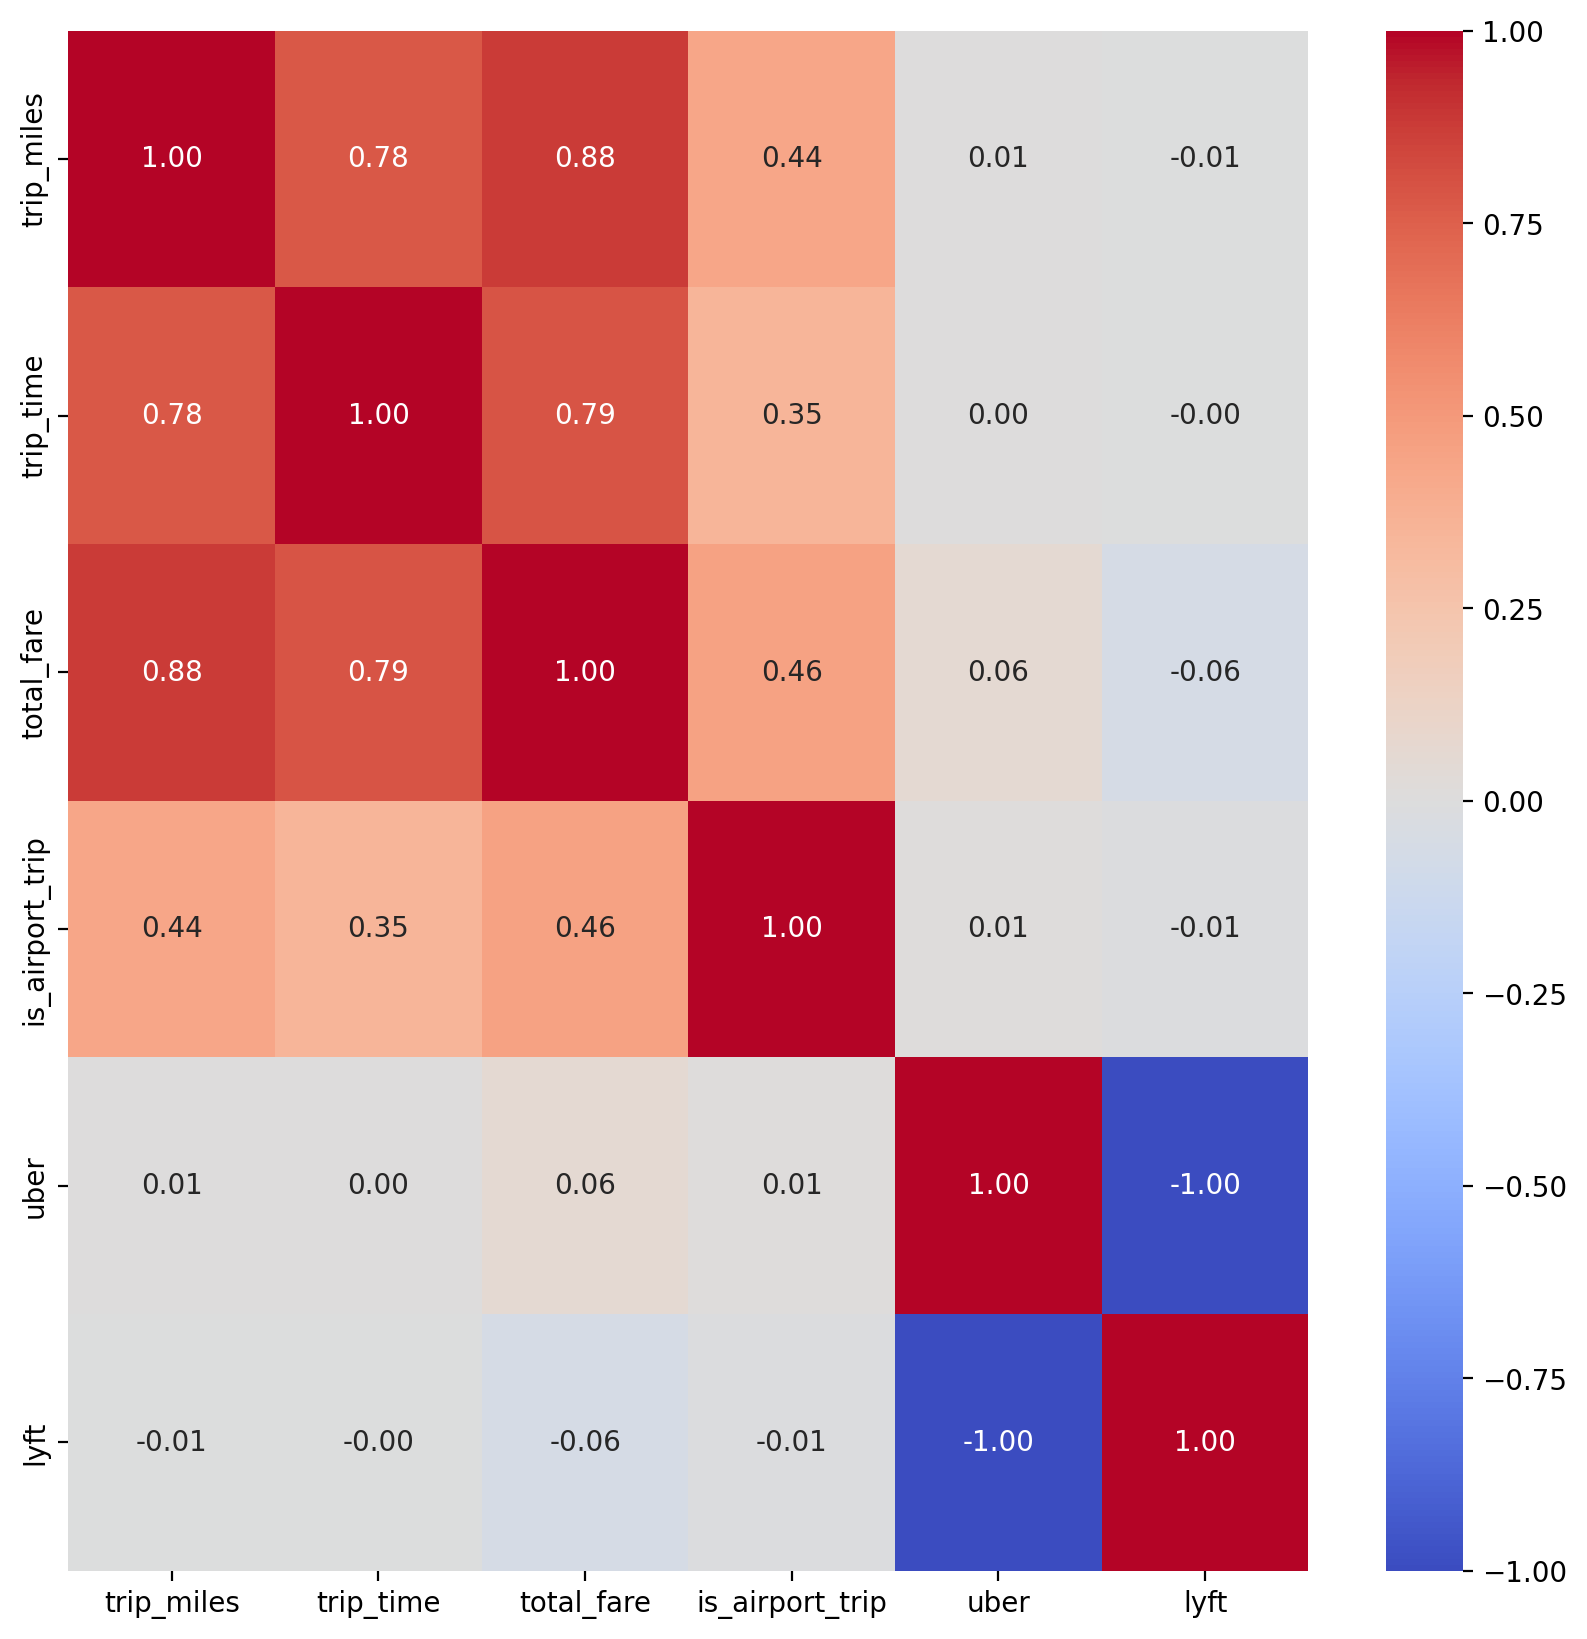

In [39]:
## generating correlation heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(corr_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

In [40]:
del corr_data

In [41]:
## dropping off uber and lyft
data.drop(columns=['uber', 'lyft'], inplace=True)

### Outliers

In [42]:
from scipy import stats

In [43]:
z_scores = np.abs(stats.zscore(data['total_fare']))
outliers = np.where(z_scores > 3)

In [44]:
data = data[(z_scores < 3)]

### Engineer date

In [45]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [46]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
# data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['pickup_day_no']=data['pickup_datetime'].dt.weekday # monday 0 - sunday 6
# data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday
data['pickup_hour']=data['pickup_datetime'].dt.hour
# data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data['pickup_month']=data['pickup_datetime'].dt.month
# data['dropoff_month']=data['dropoff_datetime'].dt.month

## ref: https://www.analyticsvidhya.com/blog/2021/01/exploratory-data-analysis-on-nyc-taxi-trip-duration-dataset/

In [47]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [48]:
# data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
# data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)

In [50]:
# data['pickup_timeofday'].value_counts()

In [52]:
# data = pd.get_dummies(data, columns=['pickup_timeofday'])

In [53]:
# for feature in ['pickup_timeofday_Afternoon','pickup_timeofday_Evening','pickup_timeofday_Late night','pickup_timeofday_Morning']:
#     data[feature] = data[feature].astype(int)

In [51]:
data.head(10)

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,total_fare,is_airport_trip,pickup_day,pickup_day_no,pickup_hour,pickup_month
12201792,2022-11-20 11:02:45,2022-11-20 11:19:49,41,48,5.280,1024,30.96000,0,Sunday,6,11,11
5140632,2022-11-09 18:19:42,2022-11-09 18:26:37,157,82,1.390,415,11.90000,0,Wednesday,2,18,11
13040156,2022-11-21 19:13:41,2022-11-21 19:33:56,163,125,4.790,1215,50.38000,0,Monday,0,19,11
2107754,2022-11-04 17:47:21,2022-11-04 18:03:00,10,130,2.210,939,15.98000,0,Friday,4,17,11
17227919,2022-11-29 15:29:02,2022-11-29 15:33:30,210,210,0.630,268,8.41000,0,Tuesday,1,15,11
10924600,2022-11-18 19:59:57,2022-11-18 20:06:06,41,238,1.140,369,8.85000,0,Friday,4,19,11
14977583,2022-11-25 10:18:30,2022-11-25 10:35:28,198,138,7.584,1018,33.50831,1,Friday,4,10,11
7891490,2022-11-13 20:03:31,2022-11-13 20:30:47,37,79,4.435,1636,28.37000,0,Sunday,6,20,11
15668172,2022-11-26 17:43:24,2022-11-26 17:53:56,143,246,1.730,632,15.77000,0,Saturday,5,17,11
12055493,2022-11-20 04:55:59,2022-11-20 05:00:53,114,249,0.630,294,11.00000,0,Sunday,6,4,11


### Target Encoding for LocationID

In [52]:
import category_encoders as ce

In [58]:
encoder = ce.TargetEncoder(cols=['PULocationID', 'DOLocationID'])
data_encoded = encoder.fit_transform(data[['PULocationID', 'DOLocationID']], data['total_fare'])

In [59]:
encoded_data = data.drop(['PULocationID', 'DOLocationID'], axis=1)
encoded_data = pd.concat([encoded_data, data_encoded], axis=1)

In [60]:
del data_encoded

In [61]:
encoded_data.drop(columns=['pickup_datetime','dropoff_datetime', 'pickup_day', 'pickup_month'], inplace=True)

In [62]:
encoded_data.head(10)

,trip_miles,trip_time,total_fare,is_airport_trip,pickup_day_no,pickup_hour,PULocationID,DOLocationID
12201792,5.280,1024,30.96000,0,6,11,28.317903,29.101343
5140632,1.390,415,11.90000,0,2,18,23.752485,21.450001
13040156,4.790,1215,50.38000,0,0,19,35.829086,25.552006
2107754,2.210,939,15.98000,0,4,17,24.298259,19.182135
17227919,0.630,268,8.41000,0,1,15,22.519662,22.132209
10924600,1.140,369,8.85000,0,4,19,28.317903,28.586880
14977583,7.584,1018,33.50831,1,4,10,18.437979,53.078822
7891490,4.435,1636,28.37000,0,6,20,21.534458,26.821236
15668172,1.730,632,15.77000,0,5,17,29.854772,29.162465
12055493,0.630,294,11.00000,0,6,4,32.926816,28.148889


### Date time information encoding

In [63]:
encoded_data['hour_sin'] = np.sin(2 * np.pi * encoded_data['pickup_hour']/24)
encoded_data['hour_cos'] = np.cos(2 * np.pi * encoded_data['pickup_hour']/24)
encoded_data['day_sin'] = np.sin(2 * np.pi * encoded_data['pickup_day_no']/7)
encoded_data['day_cos'] = np.cos(2 * np.pi * encoded_data['pickup_day_no']/7)
# encoded_data['month_sin'] = np.sin(2 * np.pi * encoded_data['pickup_month']/12)
# encoded_data['month_cos'] = np.cos(2 * np.pi * encoded_data['pickup_month']/12)


In [65]:
# encoded_data['is_weekday'] = (encoded_data['pickup_day_no'].between(0, 4)).astype(int)

In [66]:
# encoded_data['is_rush_hour'] = ((encoded_data['pickup_hour'].between(7, 9) | encoded_data['pickup_hour'].between(16, 18)) & 
#                         encoded_data['pickup_day_no'].between(0, 4)).astype(int)


In [64]:
encoded_data.head(10)

,trip_miles,trip_time,total_fare,is_airport_trip,pickup_day_no,pickup_hour,PULocationID,DOLocationID,hour_sin,hour_cos,day_sin,day_cos
12201792,5.280,1024,30.96000,0,6,11,28.317903,29.101343,0.258819,-9.659258e-01,-0.781831,0.623490
5140632,1.390,415,11.90000,0,2,18,23.752485,21.450001,-1.000000,-1.836970e-16,0.974928,-0.222521
13040156,4.790,1215,50.38000,0,0,19,35.829086,25.552006,-0.965926,2.588190e-01,0.000000,1.000000
2107754,2.210,939,15.98000,0,4,17,24.298259,19.182135,-0.965926,-2.588190e-01,-0.433884,-0.900969
17227919,0.630,268,8.41000,0,1,15,22.519662,22.132209,-0.707107,-7.071068e-01,0.781831,0.623490
10924600,1.140,369,8.85000,0,4,19,28.317903,28.586880,-0.965926,2.588190e-01,-0.433884,-0.900969
14977583,7.584,1018,33.50831,1,4,10,18.437979,53.078822,0.500000,-8.660254e-01,-0.433884,-0.900969
7891490,4.435,1636,28.37000,0,6,20,21.534458,26.821236,-0.866025,5.000000e-01,-0.781831,0.623490
15668172,1.730,632,15.77000,0,5,17,29.854772,29.162465,-0.965926,-2.588190e-01,-0.974928,-0.222521
12055493,0.630,294,11.00000,0,6,4,32.926816,28.148889,0.866025,5.000000e-01,-0.781831,0.623490


## EDA

<Axes: xlabel='trip_miles', ylabel='total_fare'>

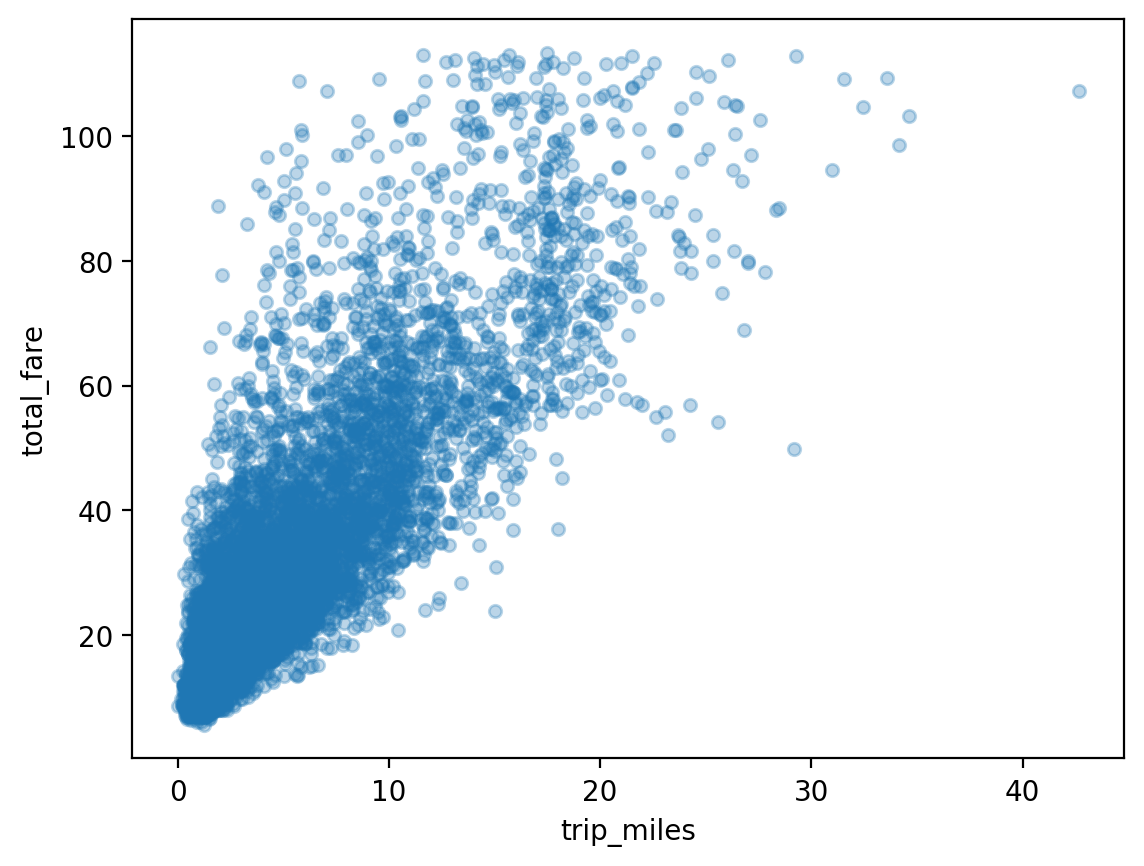

In [67]:
encoded_data.plot.scatter(x='trip_miles', y='total_fare', alpha=0.3)

<Axes: xlabel='trip_time', ylabel='total_fare'>

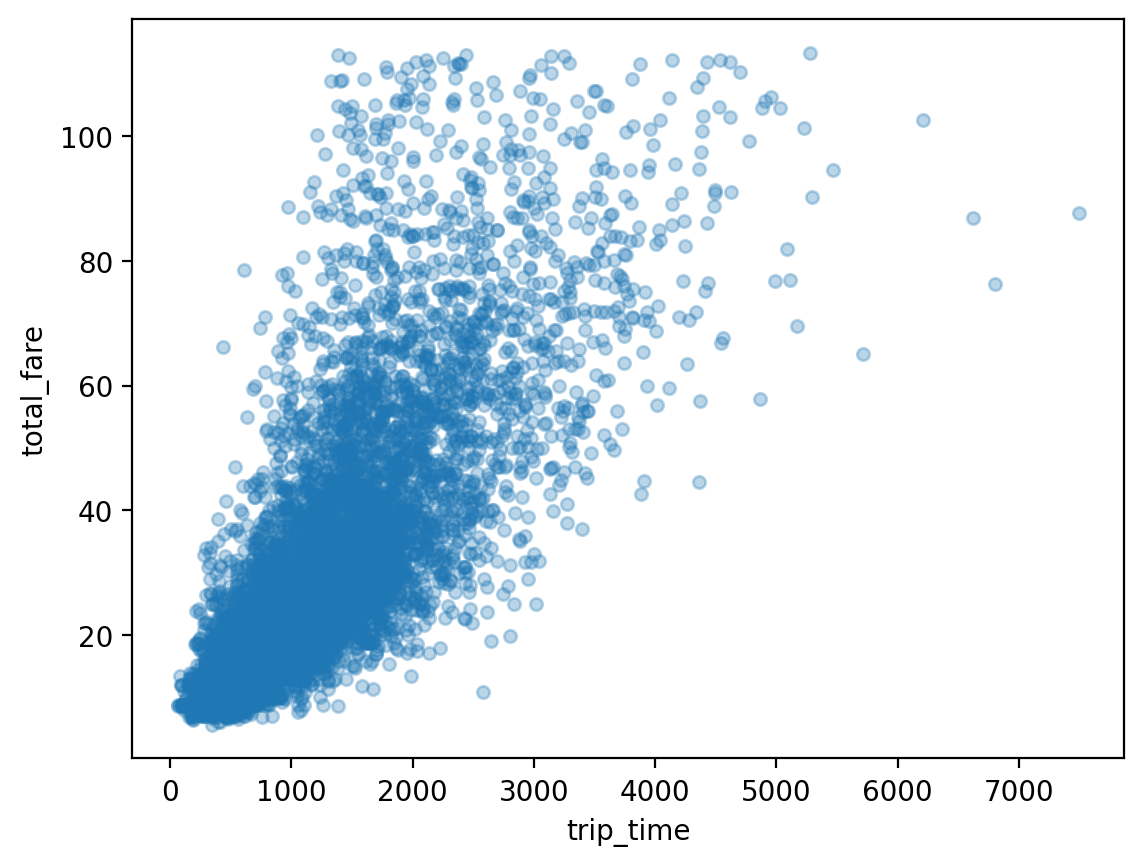

In [68]:
encoded_data.plot.scatter(x='trip_time', y='total_fare', alpha=0.3)

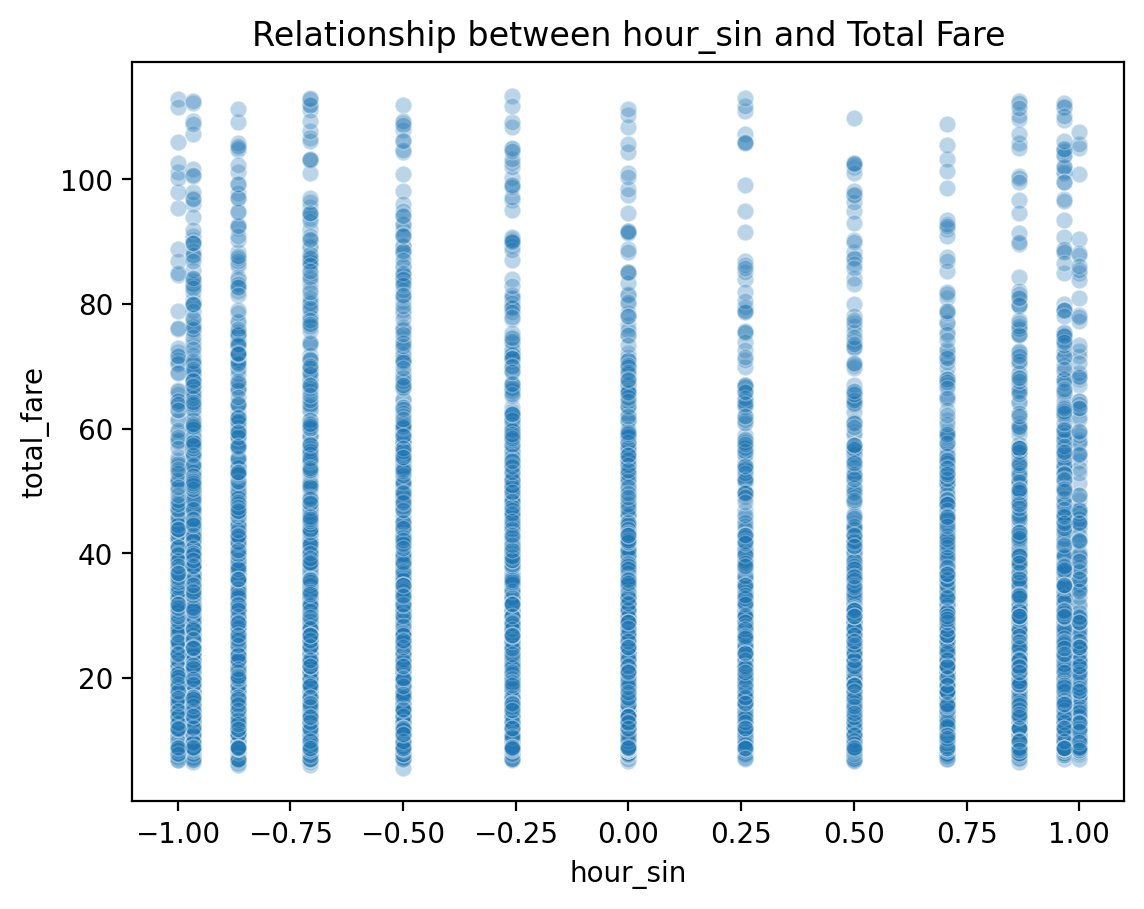

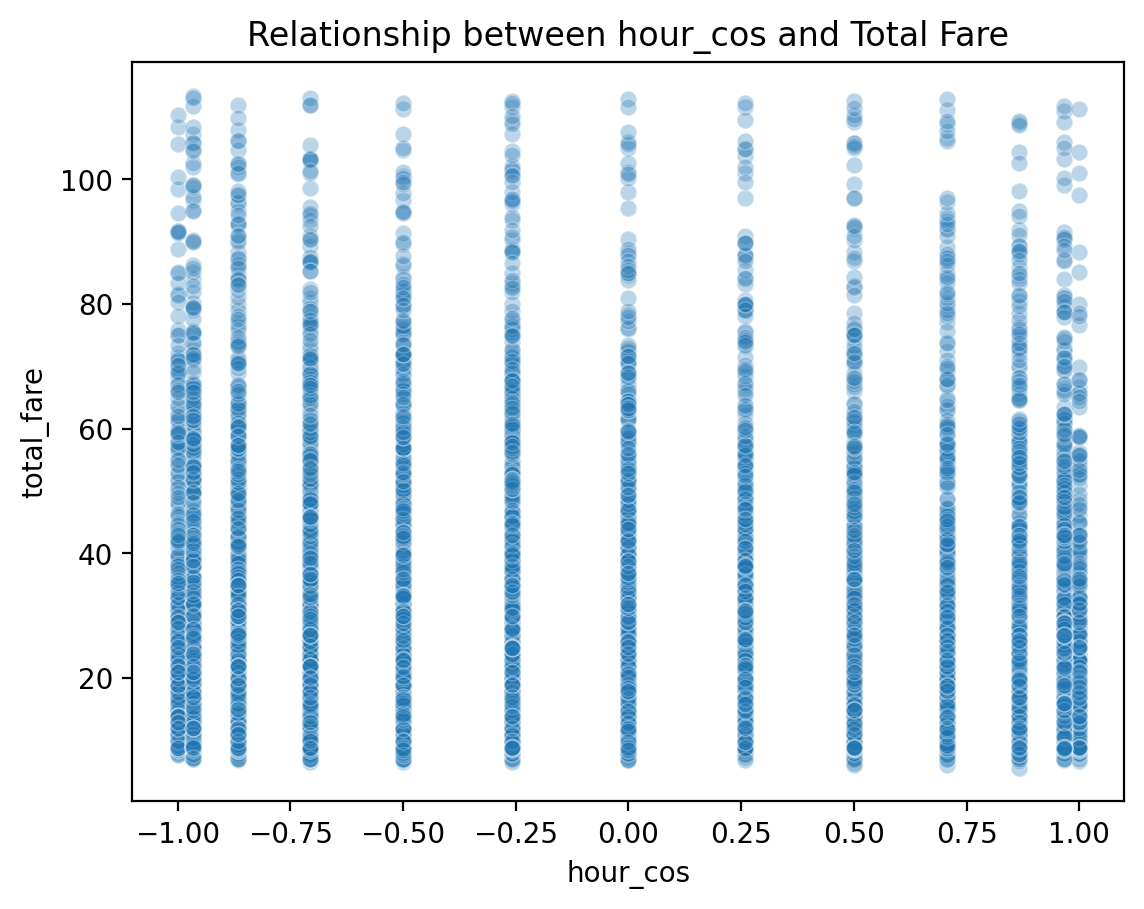

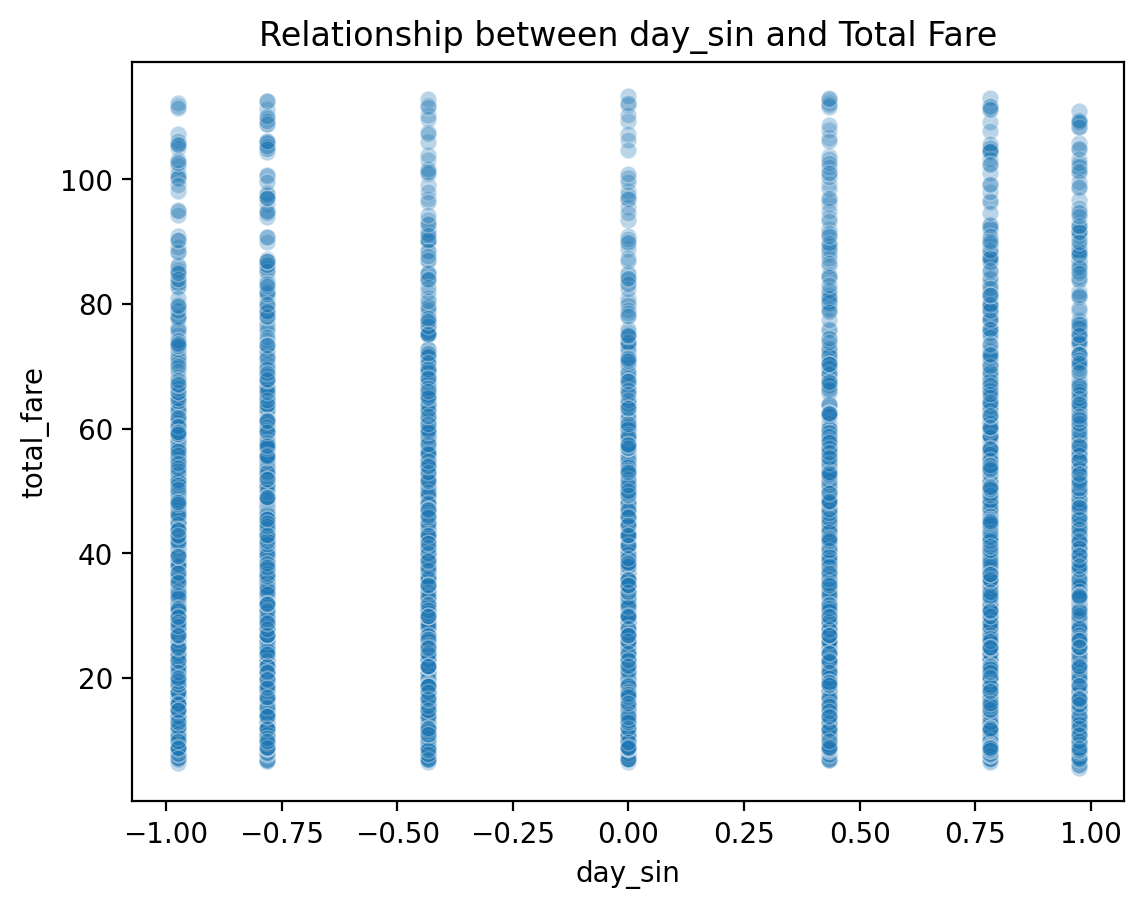

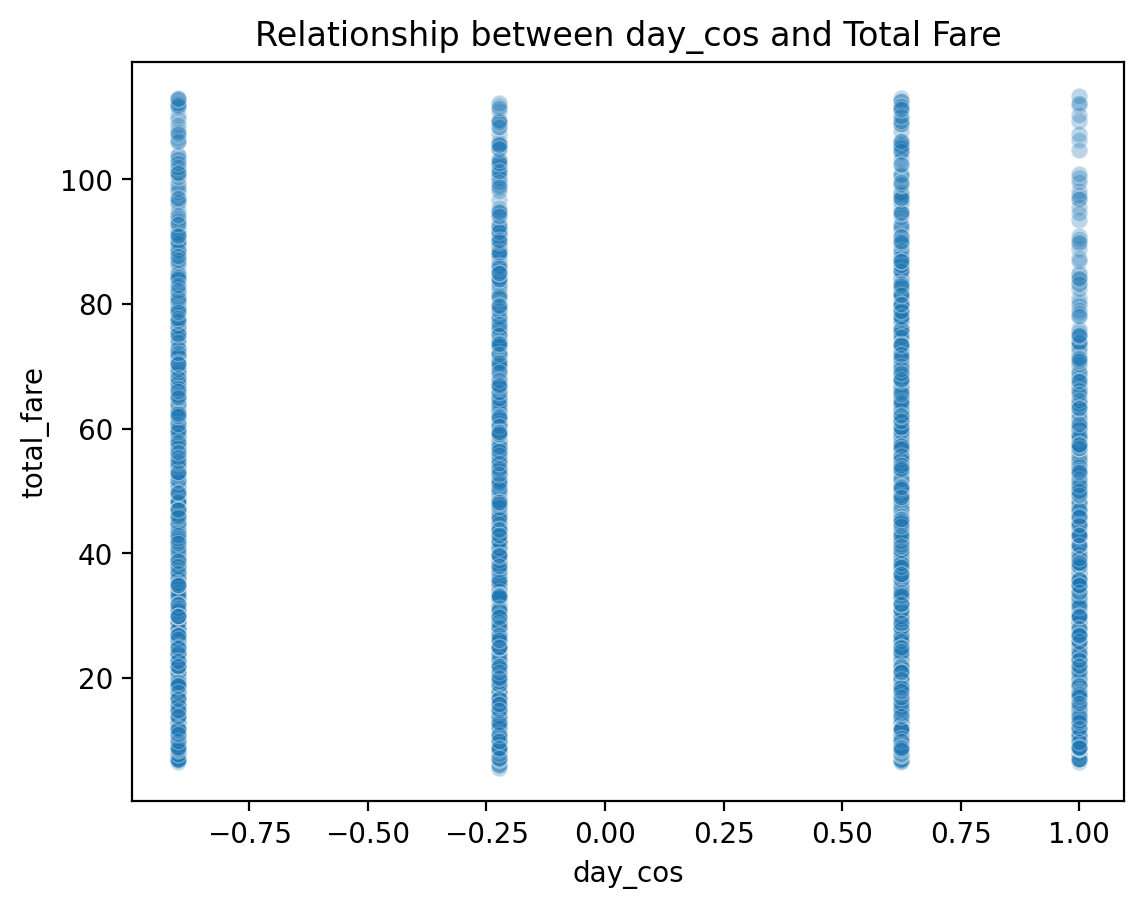

In [69]:


features = ['hour_sin', 'hour_cos', 'day_sin', 'day_cos']
for feature in features:
    sns.scatterplot(x=encoded_data[feature], y=encoded_data['total_fare'], alpha=0.3)
    plt.title(f'Relationship between {feature} and Total Fare')
    plt.show()


In [70]:
correlation_matrix = encoded_data[features + ['total_fare']].corr()
print(correlation_matrix['total_fare'])

hour_sin      0.022846
hour_cos     -0.011280
day_sin      -0.003298
day_cos      -0.005671
total_fare    1.000000
Name: total_fare, dtype: float64


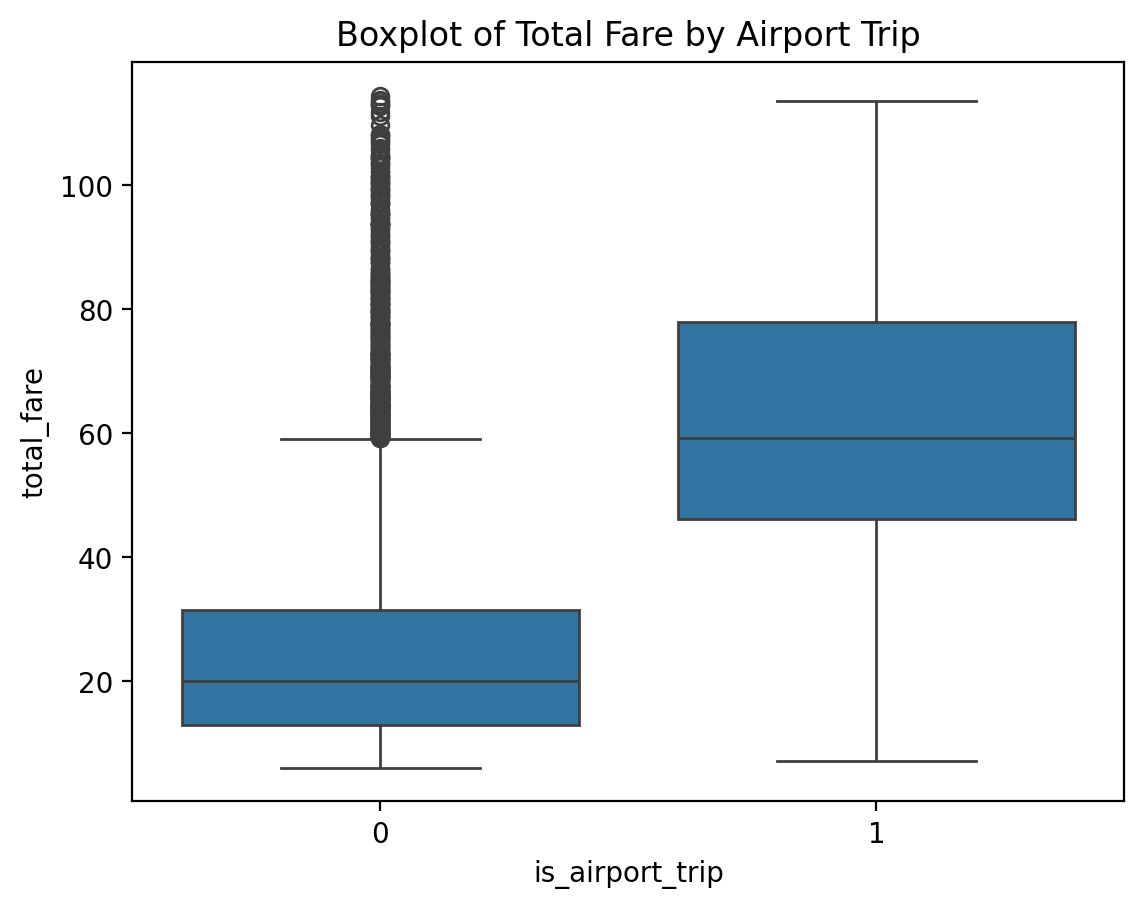

In [103]:
sns.boxplot(x='is_airport_trip', y='total_fare', data=sample_data)
plt.title('Boxplot of Total Fare by Airport Trip')
plt.show()

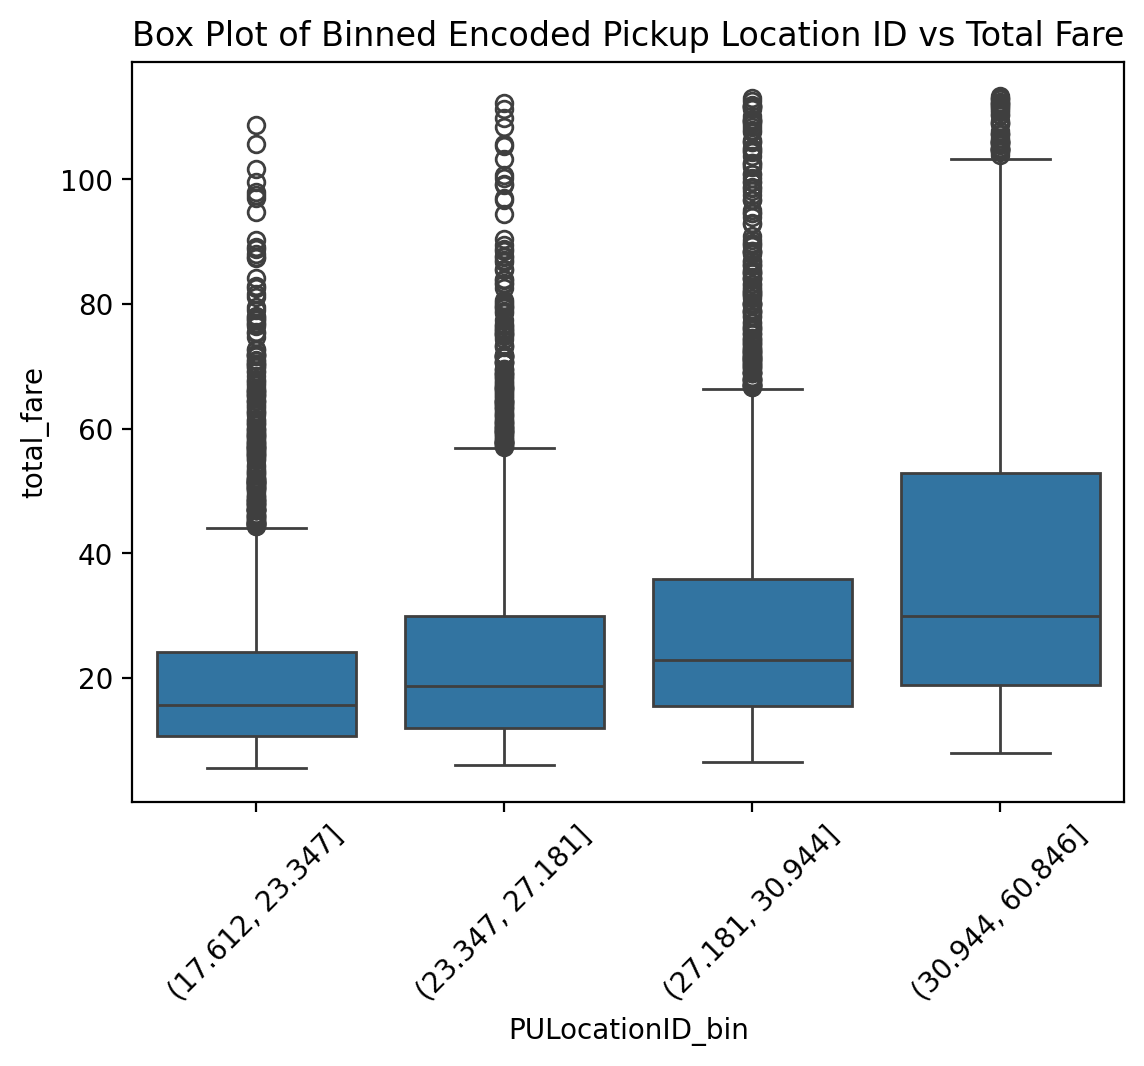

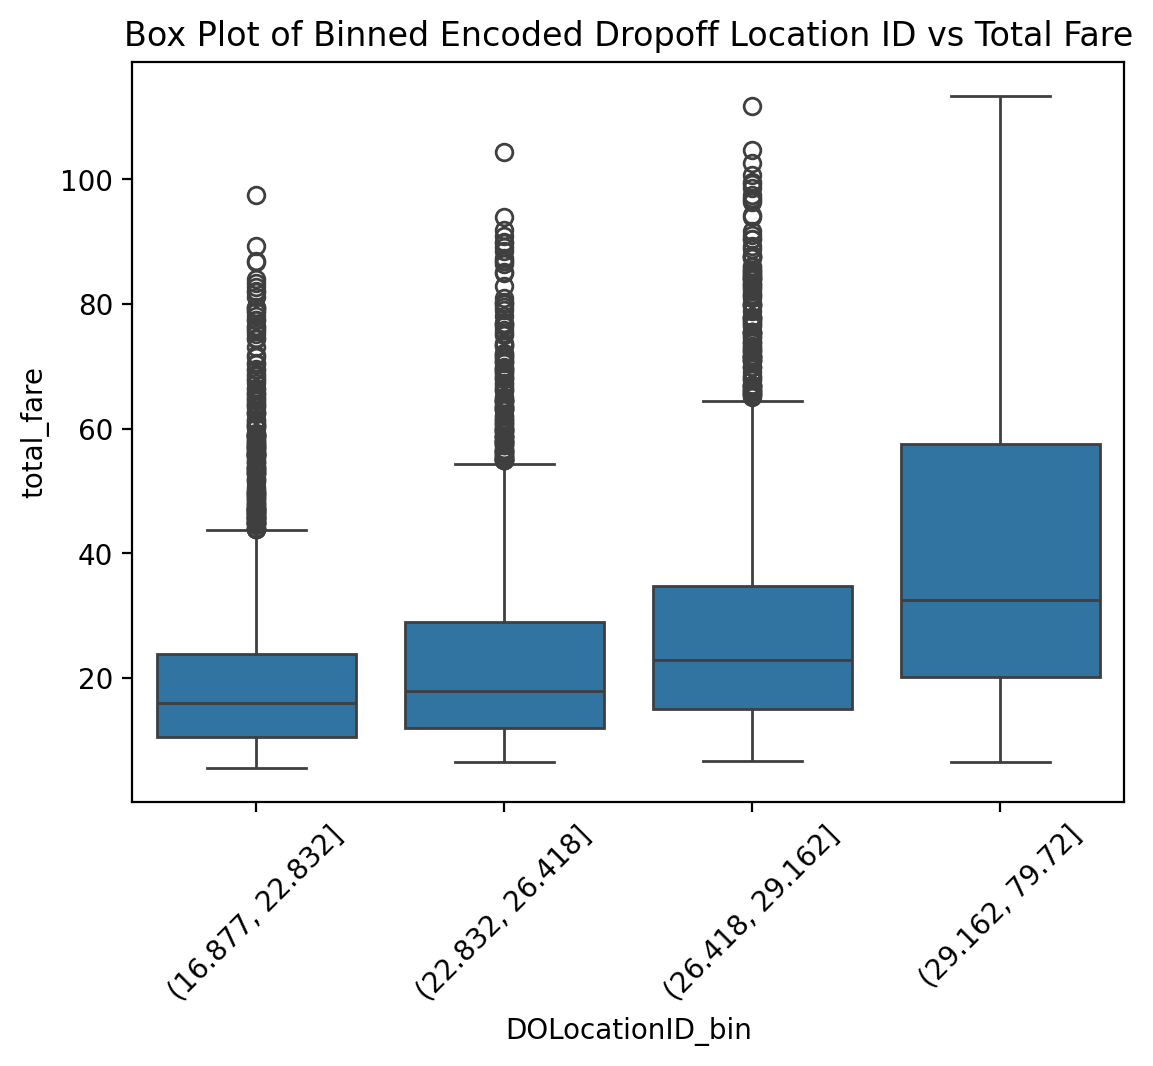

In [73]:
# Group the encoded location IDs into bins
encoded_data['PULocationID_bin'] = pd.qcut(encoded_data['PULocationID'], q=4)
encoded_data['DOLocationID_bin'] = pd.qcut(encoded_data['DOLocationID'], q=4)

sns.boxplot(x='PULocationID_bin', y='total_fare', data=encoded_data)
plt.xticks(rotation=45)
plt.title('Box Plot of Binned Encoded Pickup Location ID vs Total Fare')
plt.show()

sns.boxplot(x='DOLocationID_bin', y='total_fare', data=encoded_data)
plt.xticks(rotation=45)
plt.title('Box Plot of Binned Encoded Dropoff Location ID vs Total Fare')
plt.show()

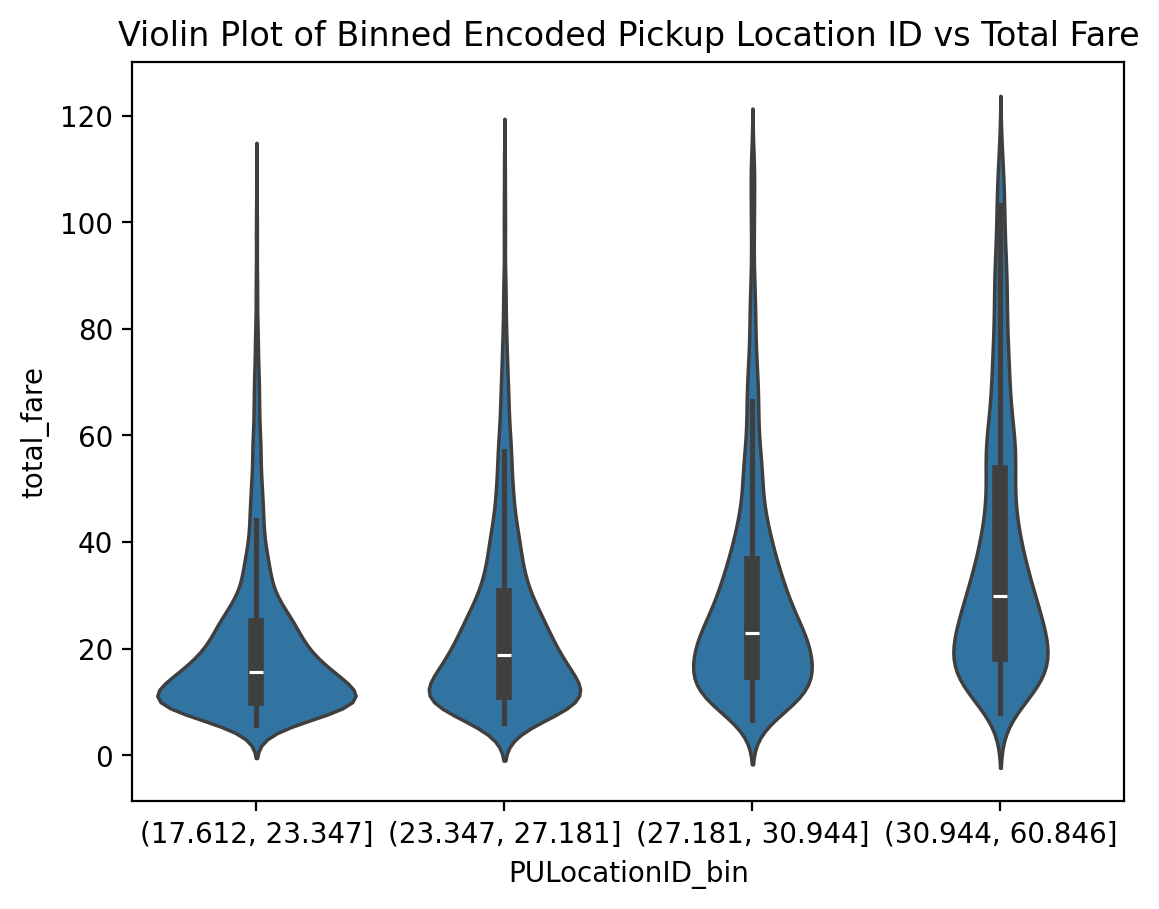

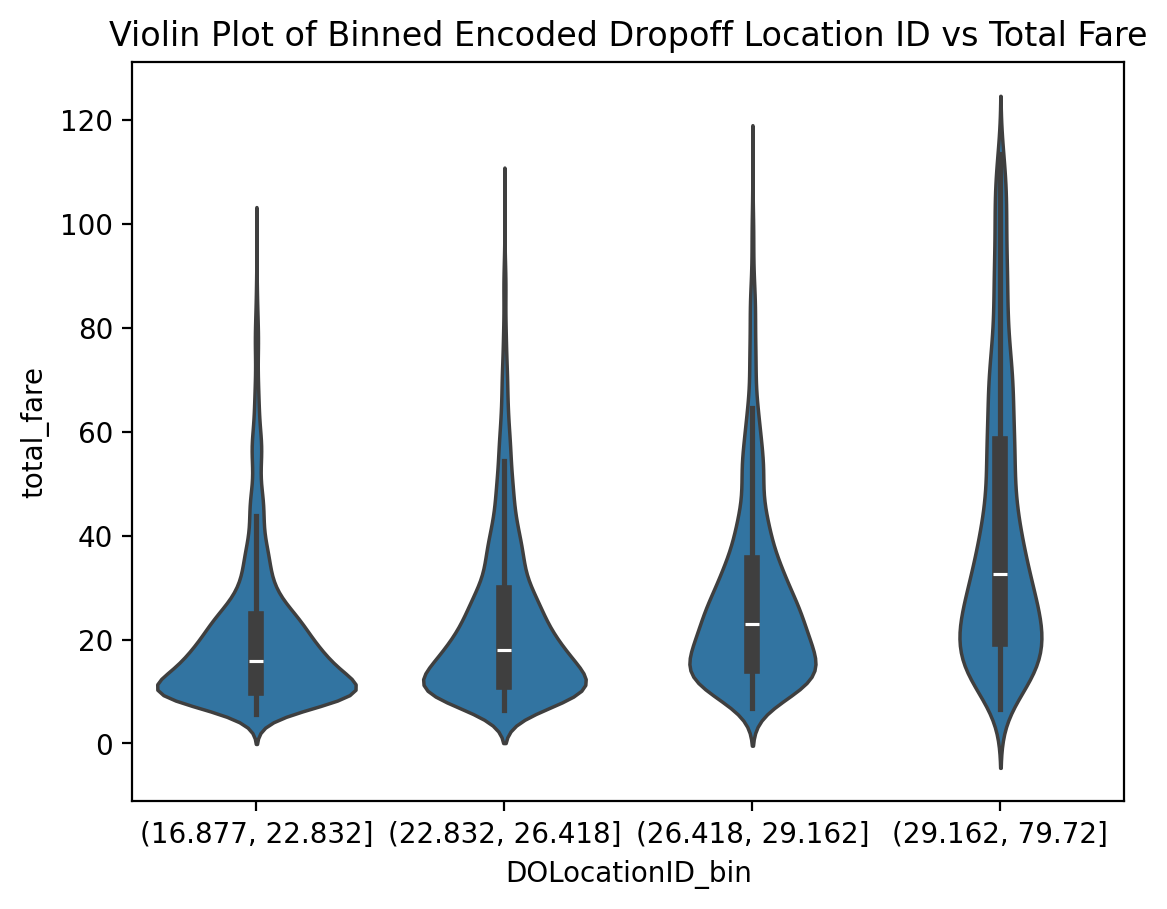

In [74]:
sns.violinplot(x='PULocationID_bin', y='total_fare', data=encoded_data)
plt.title('Violin Plot of Binned Encoded Pickup Location ID vs Total Fare')
plt.show()

sns.violinplot(x='DOLocationID_bin', y='total_fare', data=encoded_data)
plt.title('Violin Plot of Binned Encoded Dropoff Location ID vs Total Fare')
plt.show()

### PCA

In [93]:
encoded_data.drop(columns=['PULocationID_bin', 'DOLocationID_bin'], inplace=True)

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [96]:
X = encoded_data.drop('total_fare', axis=1)  # Assuming 'total_fare' is the target
y = encoded_data['total_fare']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Check column data types
print(X_train.dtypes)


trip_miles         float64
trip_time            int64
is_airport_trip      int64
pickup_day_no        int32
pickup_hour          int32
PULocationID       float64
DOLocationID       float64
hour_sin           float64
hour_cos           float64
day_sin            float64
day_cos            float64
dtype: object


In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

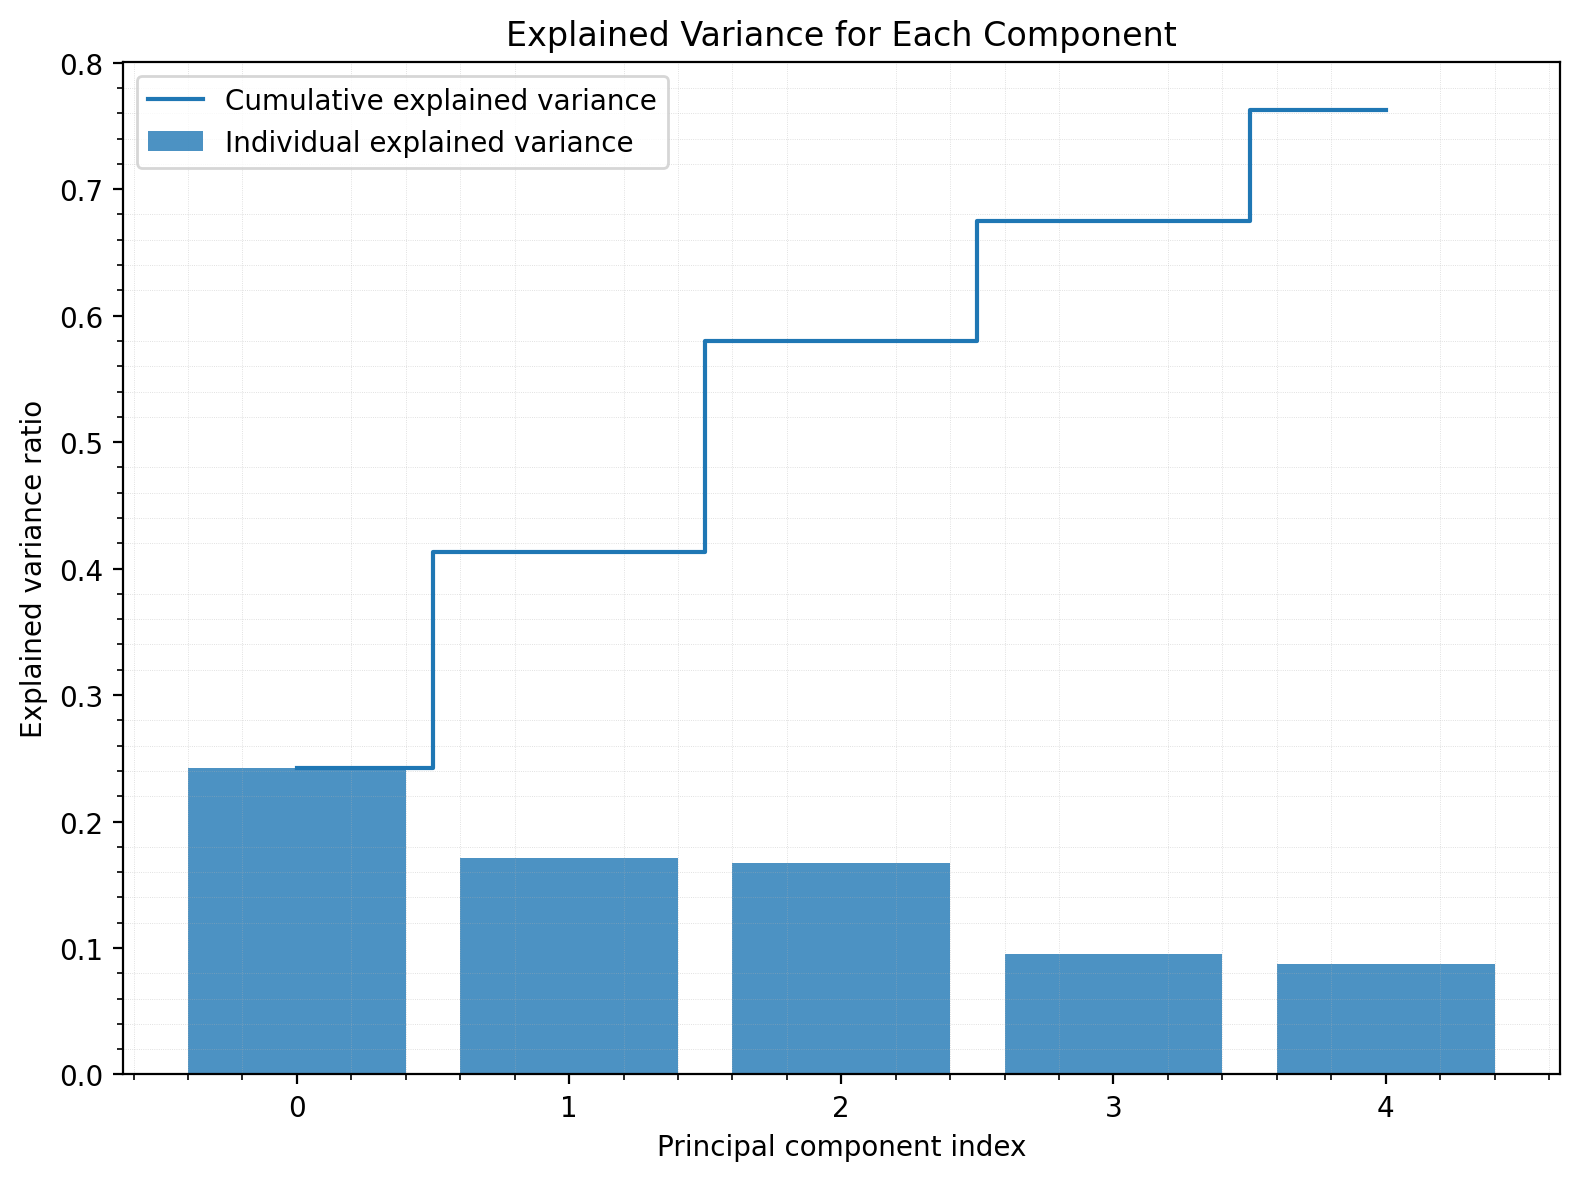

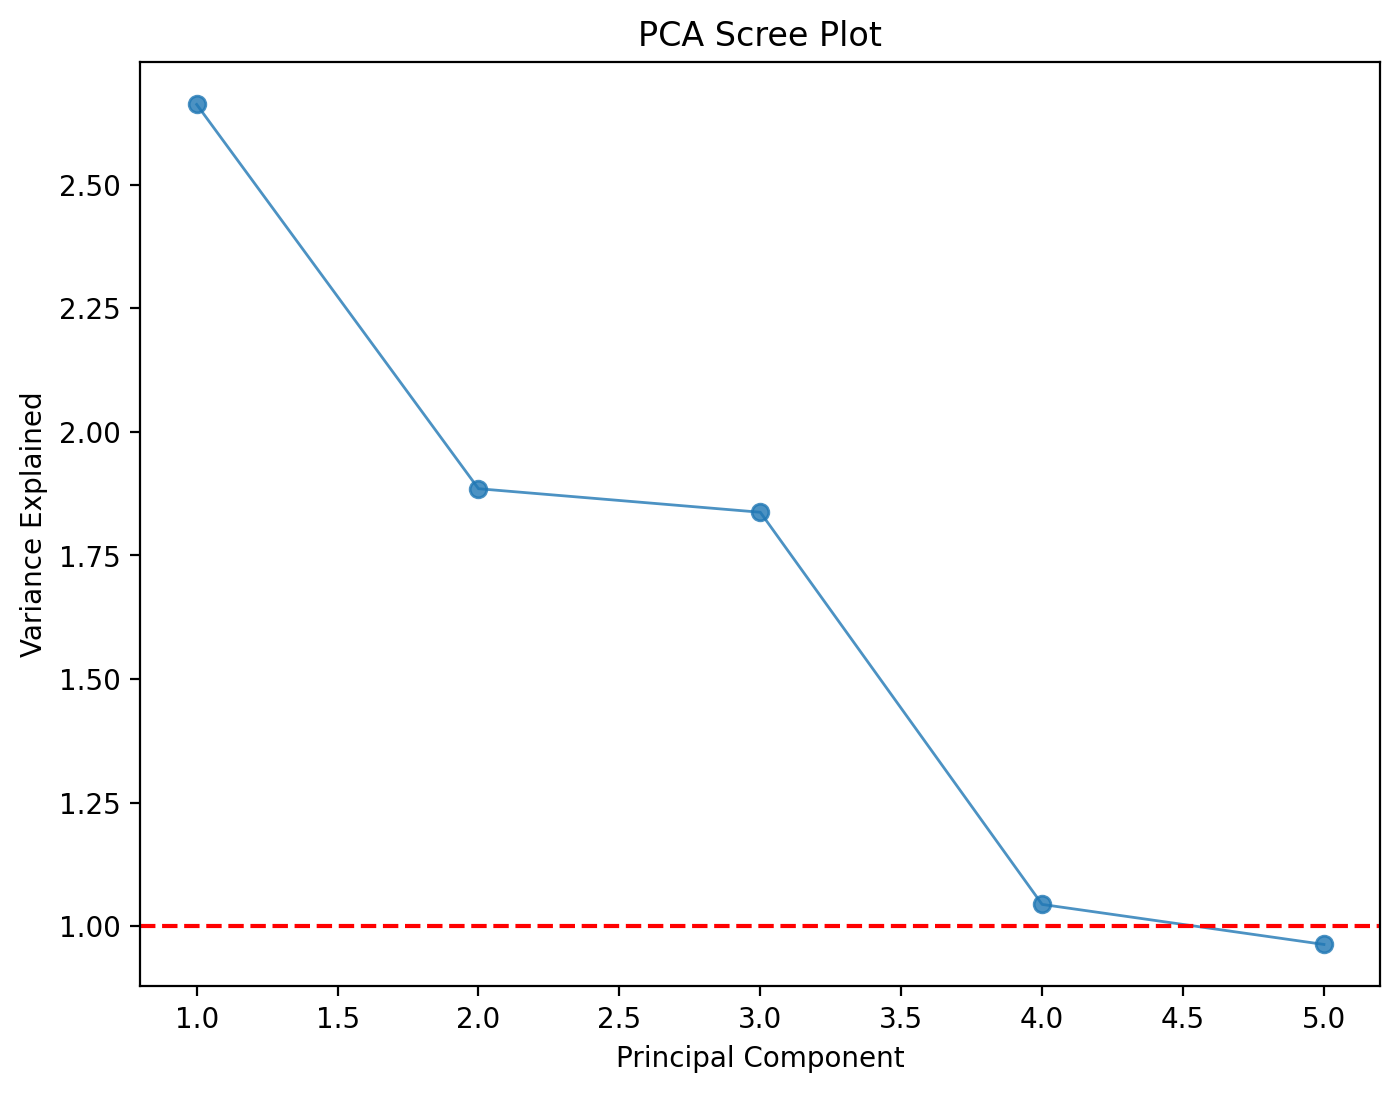

In [104]:

# Apply PCA
pca = PCA(n_components=5) 
pca.fit(X_train_scaled)
X_train_pca=pca.transform(X_train_scaled)


# Visualize explained variance for each component
exp_var_pca=pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize=(8,6))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Explained Variance for Each Component')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.3, alpha=0.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
## scree plot ##

plt.figure(figsize=(8,6))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_, 'o-', linewidth=1, alpha=0.8)
plt.axhline(y=1, color='r', linestyle='--') # The Kaiser rule suggests keeping only the PCs that have eigenvalues greater than 1.
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


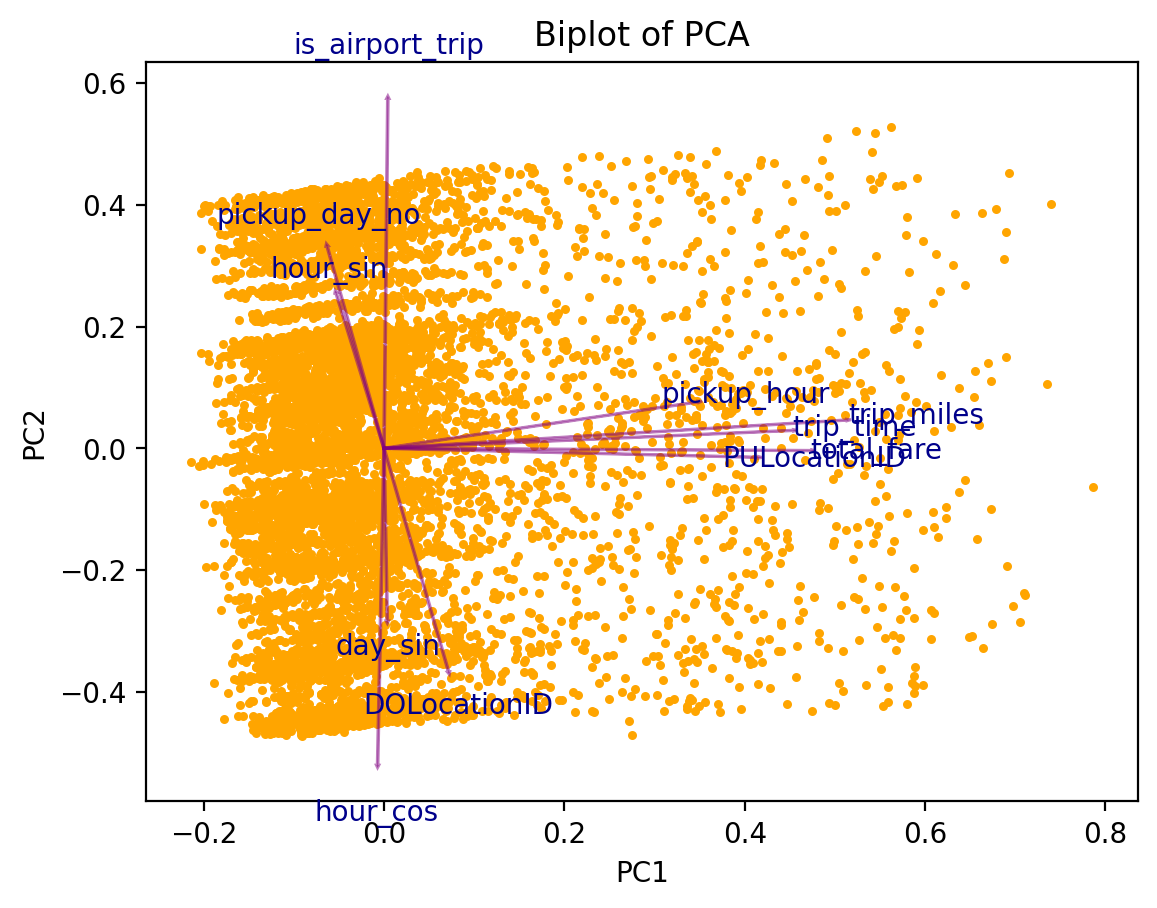

<Figure size 2000x2000 with 0 Axes>

In [106]:
def biplot(score,coef,labels=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,
                s=5,
                color='orange')

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.15,
                 coef[i,1] * 1.15,
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

    plt.figure(figsize=(20,20))

plt.title('Biplot of PCA')

biplot(X_train_pca,
       np.transpose(pca.components_),
       list(encoded_data.columns))

## Model Training

In [107]:
X_test_pca = pca.transform(X_test_scaled)

### Training

In [108]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

### Split & Scale Data

### Baseline

### Linear Regression

In [110]:
lr    = LinearRegression()
fit   = lr.fit(X_train_pca, y_train)

### KNN Regressor

In [111]:
knn   = KNeighborsRegressor(n_neighbors=5)
fit   = knn.fit(X_train_pca, y_train)

##  Evaluation

In [124]:
data.head()
sd = data[['trip_miles', 'trip_time', 'is_airport_trip','total_fare']]

X = sd.drop('total_fare', axis=1)  # Assuming 'total_fare' is the target
y = sd['total_fare']

sX_train, sX_test, sy_train, sy_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
# dictionary of the models that we chose for evaluation
models = {'lr': lr,
          'knn' : knn}

# getting the name and the model object from the dicitionary
for name, model in models.items():
    # training the model
    fit = model.fit(X_train_pca, y_train)
    scores = cross_val_score(fit, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculating the mean squared error, it was giving a negative score, so to just see the absolute error
    mean_mse = -scores.mean()

    print("Mean Squared Error (Cross-Validation):", mean_mse)

Mean Squared Error (Cross-Validation): 94.71923845321786
Mean Squared Error (Cross-Validation): 129.10739048804473


In [ ]:
# records the time to split the data set
%%timeit -r1 -n1
(X_train, X_test, y_train, y_test) = train_test_split( X, y, test_size = 0.25, random_state = 42)

In [ ]:
# records the time to create lr model, fit the data and prediction
%%timeit -r1

lr = LinearRegression()
fit   = lr.fit(X_train, y_train)
preds = fit.predict(X_test)

metrics.mean_squared_error(y_test, preds)

In [ ]:
# records the time to create knn model, fit the data and prediction
%%timeit -r1

knn = KNeighborsRegressor()
fit   = knn.fit(X_train, y_train)
preds = fit.predict(X_test)

metrics.mean_squared_error(y_test, preds)

In [ ]:
# fitting
# Records time taken for fitting lr
lr = LinearRegression()
%timeit -r1 fit   = lr.fit(X_train, y_train)

# Records time taken for fitting knn
knn = KNeighborsRegressor()
%timeit -r1 fit   = knn.fit(X_train, y_train)

In [ ]:
# predicting
# Records time taken for Prediction lr
lr = LinearRegression()
fit   = lr.fit(X_train, y_train)
%timeit -r1 preds = fit.predict(X_test)

 # Records time taken for Prediction knn
knn = KNeighborsRegressor()
fit   = knn.fit(X_train, y_train)
%timeit -r1 preds = fit.predict(X_test)

In [ ]:
!pip install memory_profiler
%load_ext memory_profiler

# set working directory
# %cd /content/drive/MyDrive/Colab Notebooks

In [ ]:
# memory test for lr
%%memit
lr = LinearRegression()
fit   = lr.fit(X_train, y_train)
preds = fit.predict(X_test)

In [ ]:
# memory test for knn
%%memit
knn = KNeighborsRegressor()
fit   = knn.fit(X_train, y_train)
preds = fit.predict(X_test)

# Milestone 2

Additional Regressor

In [115]:
from sklearn.linear_model import Lasso, ElasticNet

from sklearn import metrics

### Lasso Regressor

In [126]:
### Lasso Regression

# setting the alpha or the penalty term to 0.1
lasso = Lasso(alpha = 0.1)
# Fitting the model using cross-validation
scores = cross_val_score(lasso, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculating the mean squared error, it was giving a negative score, so to just see the absolute error
mean_mse = -scores.mean()

print("Mean Squared Error (Cross-Validation):", mean_mse)

Mean Squared Error (Cross-Validation): 94.88147964022971


### Elastic Net

In [127]:
en = ElasticNet(alpha = 0.1, random_state=0)
#making predictions
scores = cross_val_score(en, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
# getting the l2 loss
mean_mse = -scores.mean()
print("Mean Squared Error (Cross-Validation):", mean_mse)


Mean Squared Error (Cross-Validation): 95.5691061047839


In [128]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')
# Fitting the model using cross-validation
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Calculating the mean squared error
mean_mse = -scores.mean()
print("Mean Squared Error (Cross-Validation):", mean_mse)



Mean Squared Error (Cross-Validation): 129.10739048804473


In [119]:
from sklearn.svm import SVR

In [129]:
svr = SVR(kernel='rbf')
scores = cross_val_score(svr, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
# getting the l2 loss
mean_mse = -scores.mean()
print("Mean Squared Error (Cross-Validation):", mean_mse)

Mean Squared Error (Cross-Validation): 155.9156051951123


##  Evaluation

Time Taken

In [ ]:
### Lasso Regression
%%timeit -r1
lasso = Lasso(alpha = 0.1)
scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Calculating the mean squared error, it was giving a negative score, so to just see the absolute error
mean_mse = -scores.mean()

In [ ]:
### Elastic Net
%%timeit -r1
en = ElasticNet(alpha = 0.01, random_state=0)
scores = cross_val_score(en, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()


In [ ]:
### KNN
%%timeit -r1
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()



Time Taken for Fitting

In [ ]:
# lasso = Lasso(alpha = 0.1)
# %timeit -r1 lasso_fit = lasso.fit(X_train, y_train)

# en = ElasticNet(alpha = 0.01, random_state=0)
# %timeit -r1 en_fit = en.fit(X_train, y_train)



Time Taken for Prediction

In [ ]:
# lasso = Lasso(alpha = 0.1)
# lasso_fit = lasso.fit(X_train, y_train)
# %timeit -r1 preds = lasso_fit.predict(X_test)

# en = ElasticNet(alpha = 0.01, random_state=0)
# en_fit = en.fit(X_train, y_train)
# %timeit -r1 preds = en_fit.predict(X_test)

Memory Usage

In [ ]:
### Lasso Regression
%%memit
lasso = Lasso(alpha = 0.1)
scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()

In [ ]:
### Elastic Net
%%memit
en = ElasticNet(alpha = 0.01, random_state=0)
scores = cross_val_score(en, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()

In [ ]:
### Elastic Net
%%memit
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()

# Milestone 3

Feature Engineering

### Distance

In [ ]:
data.head()

In [ ]:
!pip install haversine
import haversine as hs
from haversine import Unit

In [ ]:
def calculate_distance(row):
    loc1 = (row['pickup_latitude'], row['pickup_longitude'])
    loc2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    return hs.haversine(loc1, loc2, unit=Unit.KILOMETERS)

# Apply the function to create a new column 'distance'
data['distance'] = data.apply(calculate_distance, axis=1)

In [ ]:
data.head()

In [ ]:
data['distance'] = data['distance'].replace(0, np.nan)
count_nan = data['distance'].isna().sum()
print(f"Number of Nan: {count_nan}")

In [ ]:
# drop rows with nan
data = data.dropna(subset=['distance'])
data.head(10)

### Day & Time

In [ ]:
### Day & Time
# checking datetime type
data.dtypes

In [ ]:
from datetime import datetime
import pytz

In [ ]:
temp = data

In [ ]:
def convert_date_time(input):
  given_datetime = datetime.strptime(input['pickup_datetime'], '%Y-%m-%d %H:%M:%S %Z').replace(tzinfo=pytz.utc)

  # Convert the timezone to New York
  new_york_timezone = pytz.timezone('America/New_York')
  given_datetime_new_york = given_datetime.astimezone(new_york_timezone)

  # Get the day of the week
  day_of_week = given_datetime_new_york.strftime('%A')

  # Get the time in number format (17.5 is 5:30 pm)
  time_in_number_format = given_datetime_new_york.hour + given_datetime_new_york.minute / 60

  return day_of_week, time_in_number_format
  # print(f"Day of the week: {day_of_week}")
  # print(f"Time in number format: {time_in_number_format}")


In [ ]:
temp[['day_of_week', 'time']] = temp.apply(convert_date_time, axis=1, result_type='expand')

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# temp['day_of_week'] = le.fit_transform(temp['day_of_week'])

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(temp.corr(), annot = True)

In [ ]:
temp.head()

In [ ]:
def is_weekday(day):
  return not (day == 'Saturday' or day == 'Sunday')

def is_rush_hour(time):
  if 8 <= time <= 9 or 3 <= time <= 7:
    return 1
  else:
    return 0



In [ ]:
temp['is_weekday'] = temp['day_of_week'].apply(is_weekday)

In [ ]:
temp.head()

In [ ]:
temp['is_rushhour'] = temp['time'].apply(is_rush_hour)

In [ ]:
temp.head()

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(temp.corr(), annot = True)

### Training

In [ ]:
X = temp[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','passenger_count','distance','is_weekday','is_rushhour']]
y = temp['fare_amount']

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split( X, y, test_size = 0.25,random_state = 42)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# creating validation sets
X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


alpha_values = [0.0001,0.01, 0.1, 1, 10]

# to be used for our df
results = []


for alpha in alpha_values:
  en = ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=0)
  en.fit(X_train_orig, y_train_orig)
  # us making the predictions on the validation set
  preds_val = en.predict(X_val_orig)
  mse_val = metrics.mean_squared_error(y_val_orig, preds_val)
  # Store results in the list
  results.append({'Alpha': alpha,'Mean Squared Error (Validation)': mse_val})

# creating the table as a dataframe for our analysis
results_df = pd.DataFrame(results)
results_df





In [ ]:
results = []


for alpha in alpha_values:

    lasso = Lasso(alpha=alpha, random_state=0)
    lasso.fit(X_train_orig, y_train_orig)
    # Make predictions on the validation set
    preds_val = lasso.predict(X_val_orig)
    mse_val = metrics.mean_squared_error(y_val_orig, preds_val)

    # Store results in the list
    results.append({'Alpha': alpha, 'Mean Squared Error (Validation)': mse_val})

results_df = pd.DataFrame(results)
results_df

In [ ]:

neighbor_values = [3, 5, 7, 10, 15]

results = []


for neighbors in neighbor_values:
    knn = KNeighborsRegressor(n_neighbors=neighbors)
    knn.fit(X_train_orig, y_train_orig)
    # again the validation set
    preds_val = knn.predict(X_val_orig)
    mse_val = metrics.mean_squared_error(y_val_orig, preds_val)
    results.append({'Neighbors': neighbors, 'Mean Squared Error (Validation)': mse_val})

# creating the table as a dataframe for our analysis
results_df = pd.DataFrame(results)
results_df

In [ ]:
en = ElasticNet(alpha=0.0001, l1_ratio=0.50, random_state=0)
lasso = Lasso(alpha=0.0001)
knn = KNeighborsRegressor(n_neighbors=15)
lr    = LinearRegression()
# fitting the models
en = en.fit(X_train, y_train)
lasso = lasso.fit(X_train, y_train)
knn = knn.fit(X_train, y_train)
lr = lr.fit(X_train, y_train)

# getting the predictiosn
en_preds = en.predict(X_test)
lasso_preds = lasso.predict(X_test)
knn_preds = knn.predict(X_test)
lr_preds = lr.predict(X_test)

# getting the mean squared error
en_mse = mean_squared_error(y_test, en_preds)
lasso_mse = mean_squared_error(y_test, lasso_preds)
knn_mse = mean_squared_error(y_test, knn_preds)
lr_mse = mean_squared_error(y_test, lr_preds)

print("Mean Squared Error (ElasticNet):", en_mse)
print("Mean Squared Error (Lasso):", lasso_mse)
print("Mean Squared Error (KNeighborsRegressor):", knn_mse)
print("Mean Squared Error (Linear Regressir):", lr_mse)

### Performance

#### Total Time

In [ ]:
%%timeit -r1
lasso = Lasso(alpha = 0.01)
fit = lasso.fit(X_train, y_train)
preds = fit.predict(X_test)
metrics.mean_squared_error(y_test, preds)

In [ ]:
%%timeit -r1
en = ElasticNet(alpha=0.00001, l1_ratio=0.50, random_state=0)
fit = en.fit(X_train, y_train)
preds = fit.predict(X_test)
metrics.mean_squared_error(y_test, preds)

In [ ]:
%%timeit -r1
knn = KNeighborsRegressor(n_neighbors=15)
fit=knn.fit(X_train, y_train)
preds = fit.predict(X_test)
metrics.mean_squared_error(y_test, preds)

#### Time for fitting

In [ ]:
lasso = Lasso(alpha = 0.1)
%timeit -r1 lasso_fit = lasso.fit(X_train, y_train)

en = ElasticNet(alpha = 0.01, random_state=0)
%timeit -r1 en_fit = en.fit(X_train, y_train)

knn = KNeighborsRegressor(n_neighbors=15)
%timeit -r1 knn_fit = knn.fit(X_train, y_train)


#### Time for prediction

In [ ]:
lasso = Lasso(alpha = 0.1)
lasso_fit = lasso.fit(X_train, y_train)
%timeit -r1 preds = lasso_fit.predict(X_test)

en = ElasticNet(alpha = 0.01, random_state=0)
en_fit = en.fit(X_train, y_train)
%timeit -r1 preds = en_fit.predict(X_test)

knn = KNeighborsRegressor(n_neighbors=15)
fit=knn.fit(X_train, y_train)
%timeit -r1 preds = fit.predict(X_test)


#### Memory Usage

In [ ]:
%%memit -r1
lasso = Lasso(alpha = 0.01)
fit = lasso.fit(X_train, y_train)
preds = fit.predict(X_test)
metrics.mean_squared_error(y_test, preds)

In [ ]:
%%memit -r1
en = ElasticNet(alpha=0.00001, l1_ratio=0.50, random_state=0)
fit = en.fit(X_train, y_train)
preds = fit.predict(X_test)
metrics.mean_squared_error(y_test, preds)

In [ ]:
%%memit -r1
knn = KNeighborsRegressor(n_neighbors=15)
fit=knn.fit(X_train, y_train)
preds = fit.predict(X_test)
metrics.mean_squared_error(y_test, preds)